In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Check Observables

We check the observables for different lattice sizes of the $\mathbb{Z}_2$ model changing the Hamiltonian parameter $g$.

$$ H = -g\sum_{i}\sigma_i^x -\frac{1}{g} \sum_{i}\square_i^{Plaquette} $$

In [35]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors, binders_cumul

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

## Observables with different Bond Dimensions $\chi$

### 1. t'Hooft String

In [3]:
def plot_thooft_string_lattice(L, l, chis, h_i, h_f, npoints, lx, ly):
    hs = np.linspace(h_i,h_f,npoints)
    # hs = np.logspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

    colors = create_sequential_colors(len(chis))
    strings = []
    for i, chi in enumerate(chis):
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        strings.append(string)
        plt.plot(hs, string, color=colors[i], label=f"$\chi={chi}$")
    plt.title(f"t'Hooft String of $Z_2$ direct lattice ${l}$x${L}$")
    plt.legend();
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")
    return strings

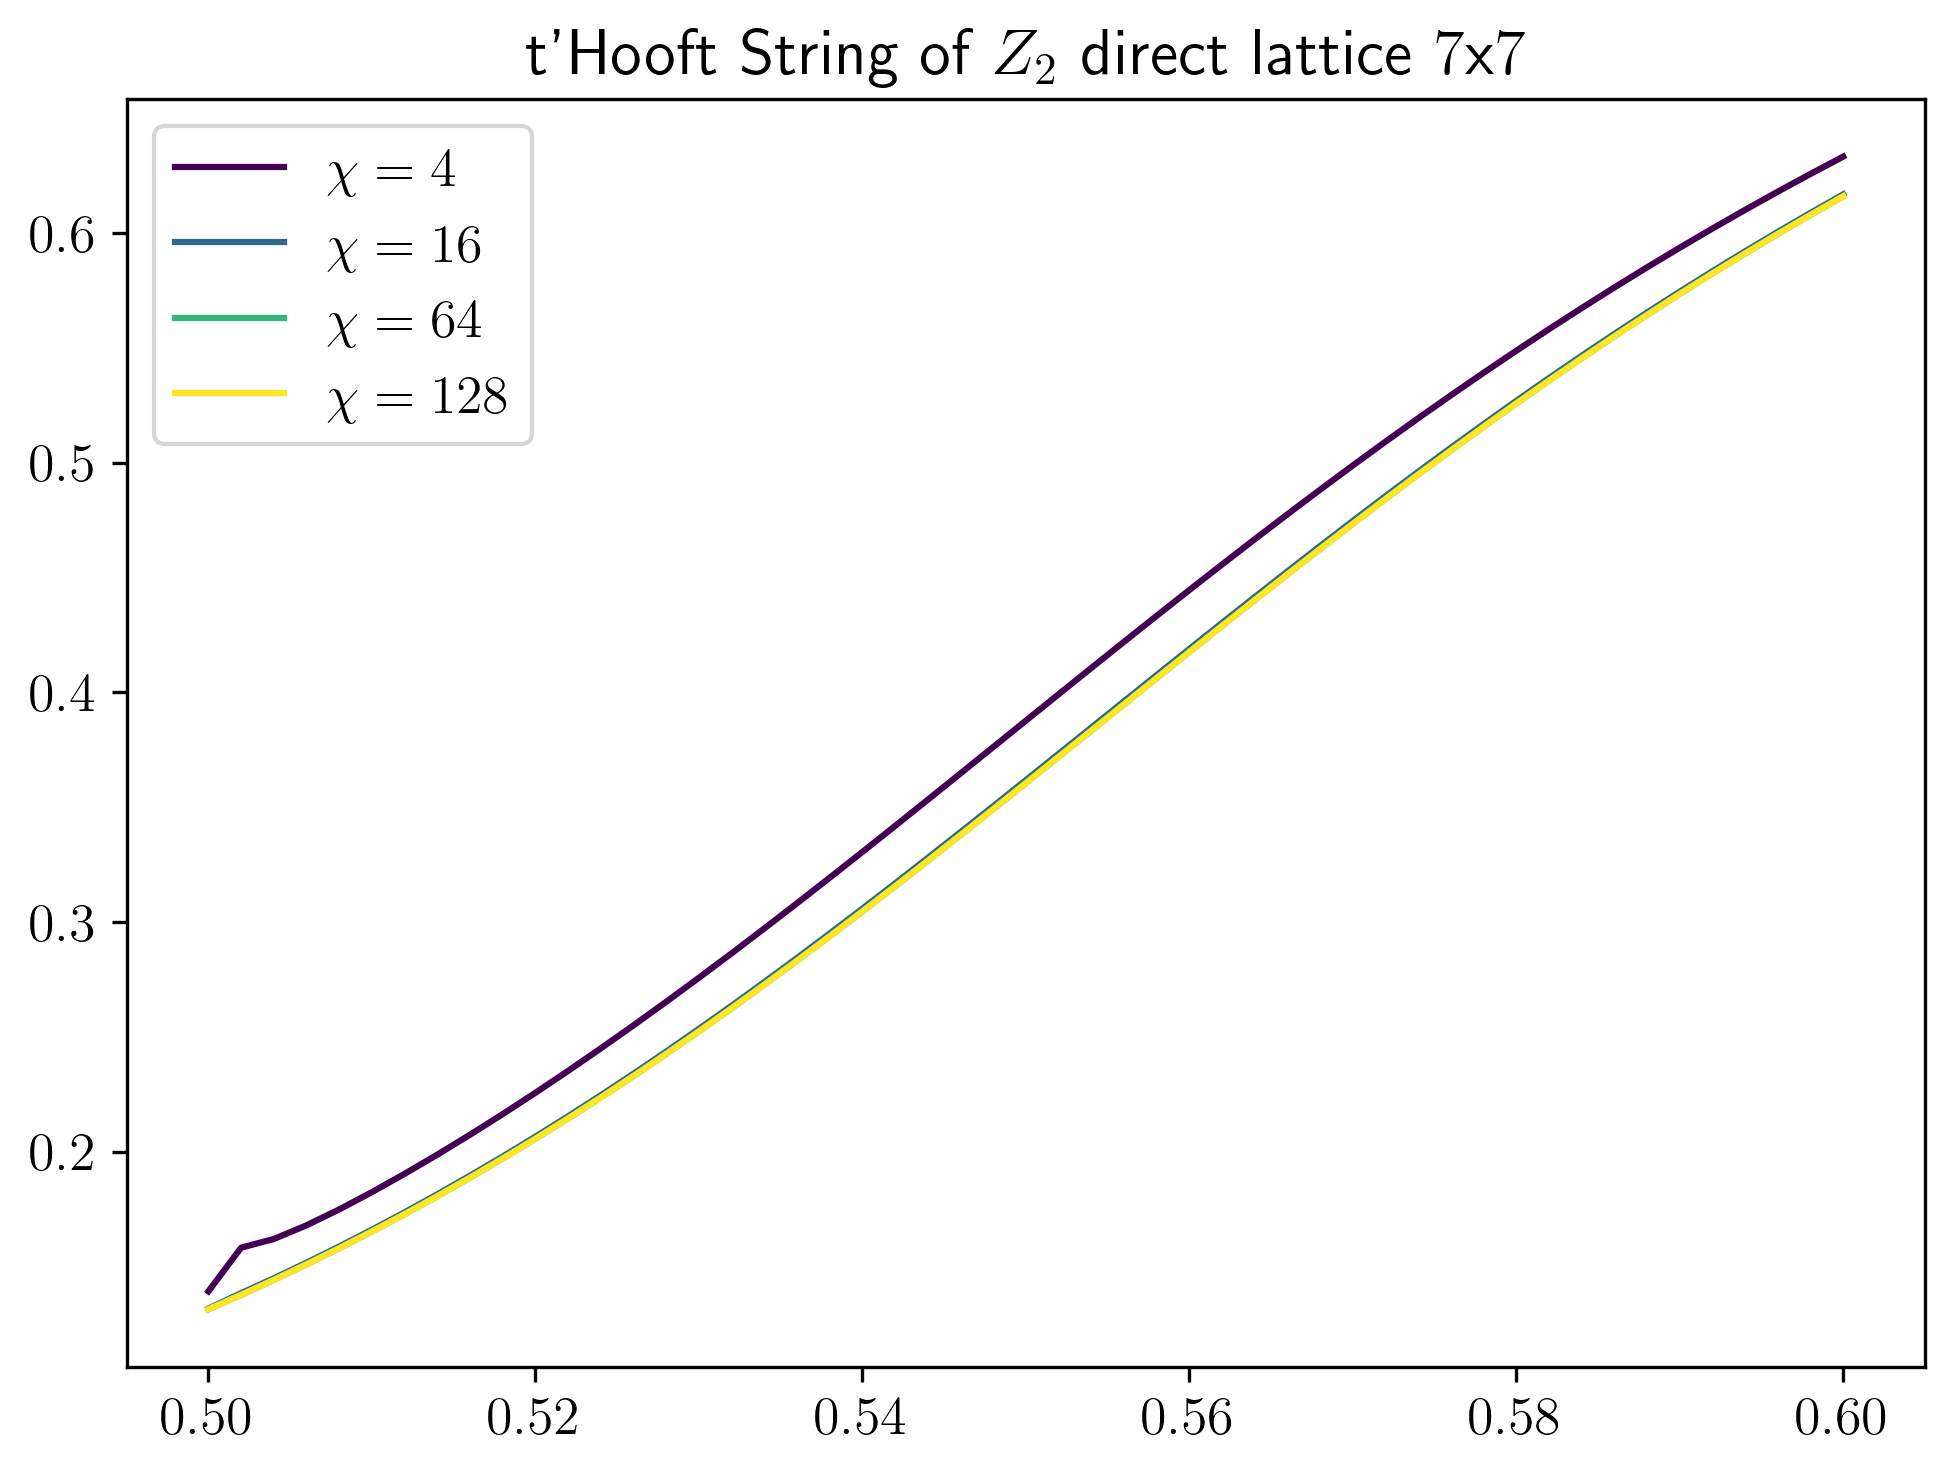

In [4]:
chis = [4,16,64,128]
L = 7
l = L
h_i = 0.5
h_f = 0.6
lx = 3
ly = 3
npoints = 51
strings = plot_thooft_string_lattice(L,l,chis,h_i,h_f,npoints,lx,ly)

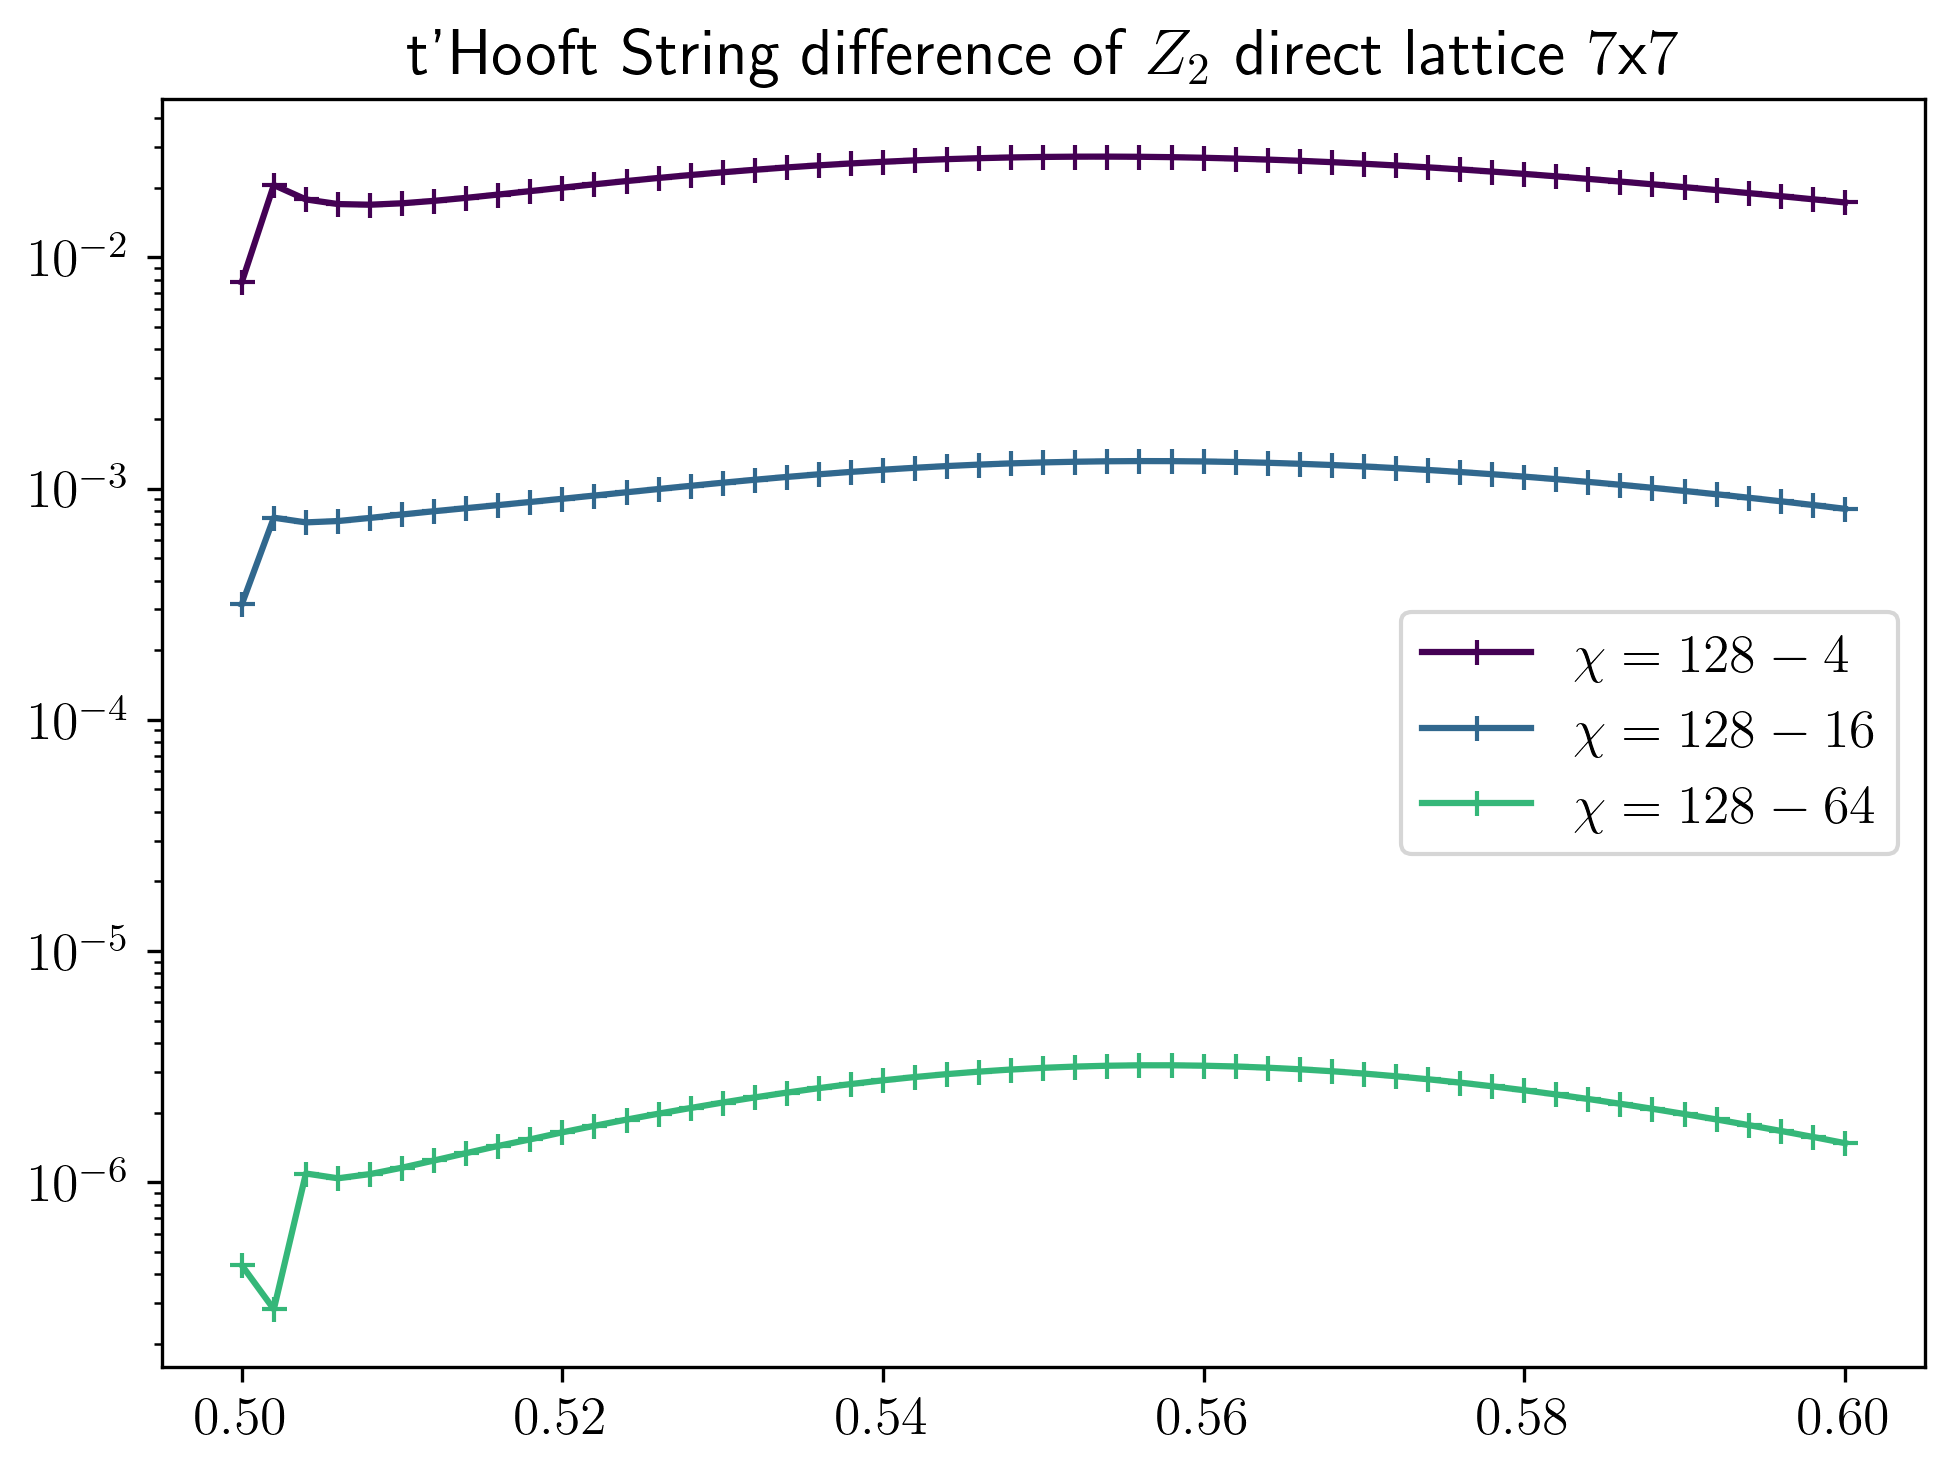

In [5]:
# plot difference between curves
hs = np.linspace(h_i,h_f,npoints)
parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
colors = create_sequential_colors(len(chis))
for i, chi in enumerate(chis):
    if chi == chis[-1]:
        break
    else:
        diffs = np.abs(np.asarray(strings[-1])-np.asarray(strings[i]))
        plt.plot(hs, diffs, color=colors[i], marker='+', label=f"$\chi={chis[-1]}-{chis[i]}$")
plt.title(f"t'Hooft String difference of $Z_2$ direct lattice ${l}$x${L}$")
plt.yscale('log')
plt.legend();
plt.savefig(f"{parent_path}/figures/thooft/thooft_string_difference_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


### Checking symmetries of the OBC

In [36]:
def load_string(loop_sites):
    lx, ly = loop_sites
    def string_fn(**kwparams):
        h_i = kwparams.get('h_i')
        h_f = kwparams.get('h_f')
        npoints = kwparams.get('npoints')
        cx = kwparams.get('cx', None)
        cy = kwparams.get('cy', None)
        sector = kwparams.get('sector', 'vacuum_sector')
        parent_path = kwparams.get('parent_path')
        L = kwparams.get('L')
        l = L
        chi = kwparams.get('chi')
        return np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    return string_fn

def compare_strings(L, ref_site):
    lx, ly = ref_site
    lx_inv = L-1 - lx
    ly_inv = L-1 - ly
    if L//2 == lx:
        print("On the vertical symmetry axis of the lattice")
    if L//2 == ly:
        print("On the horizontal symmetry axis of the lattice")

    string1 = load_string((lx, ly))
    string2 = load_string((lx_inv, ly_inv))
    string3 = load_string((lx_inv, ly))
    string4 = load_string((lx, ly_inv))
    def compare_strings_fn(**kwparams):
        return string1(**kwparams), string2(**kwparams), string3(**kwparams), string4(**kwparams)
    return compare_strings_fn

def plot_compare_strings(ref_site, params: dict, *args, **kwargs):
    L = params.get('L')
    strings = compare_strings(L, ref_site)(**params)
    hs = np.linspace(params.get('h_i'), params.get('h_f'), params.get('npoints'))
    labels = ("ref site", "xy inv", "x inv", "y inv")
    for string, label in zip(strings, labels):
        plt.plot(hs, string, *args, label=label, **kwargs)
    plt.legend()

In [37]:
L = 4
chi = 64
ref_site = (1, 1)
h_i = 0.5
h_f = 0.6
npoints = 101
parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"
params = dict(L=L, chi=chi, h_i=h_i, h_f=h_f, npoints=npoints, parent_path=parent_path)

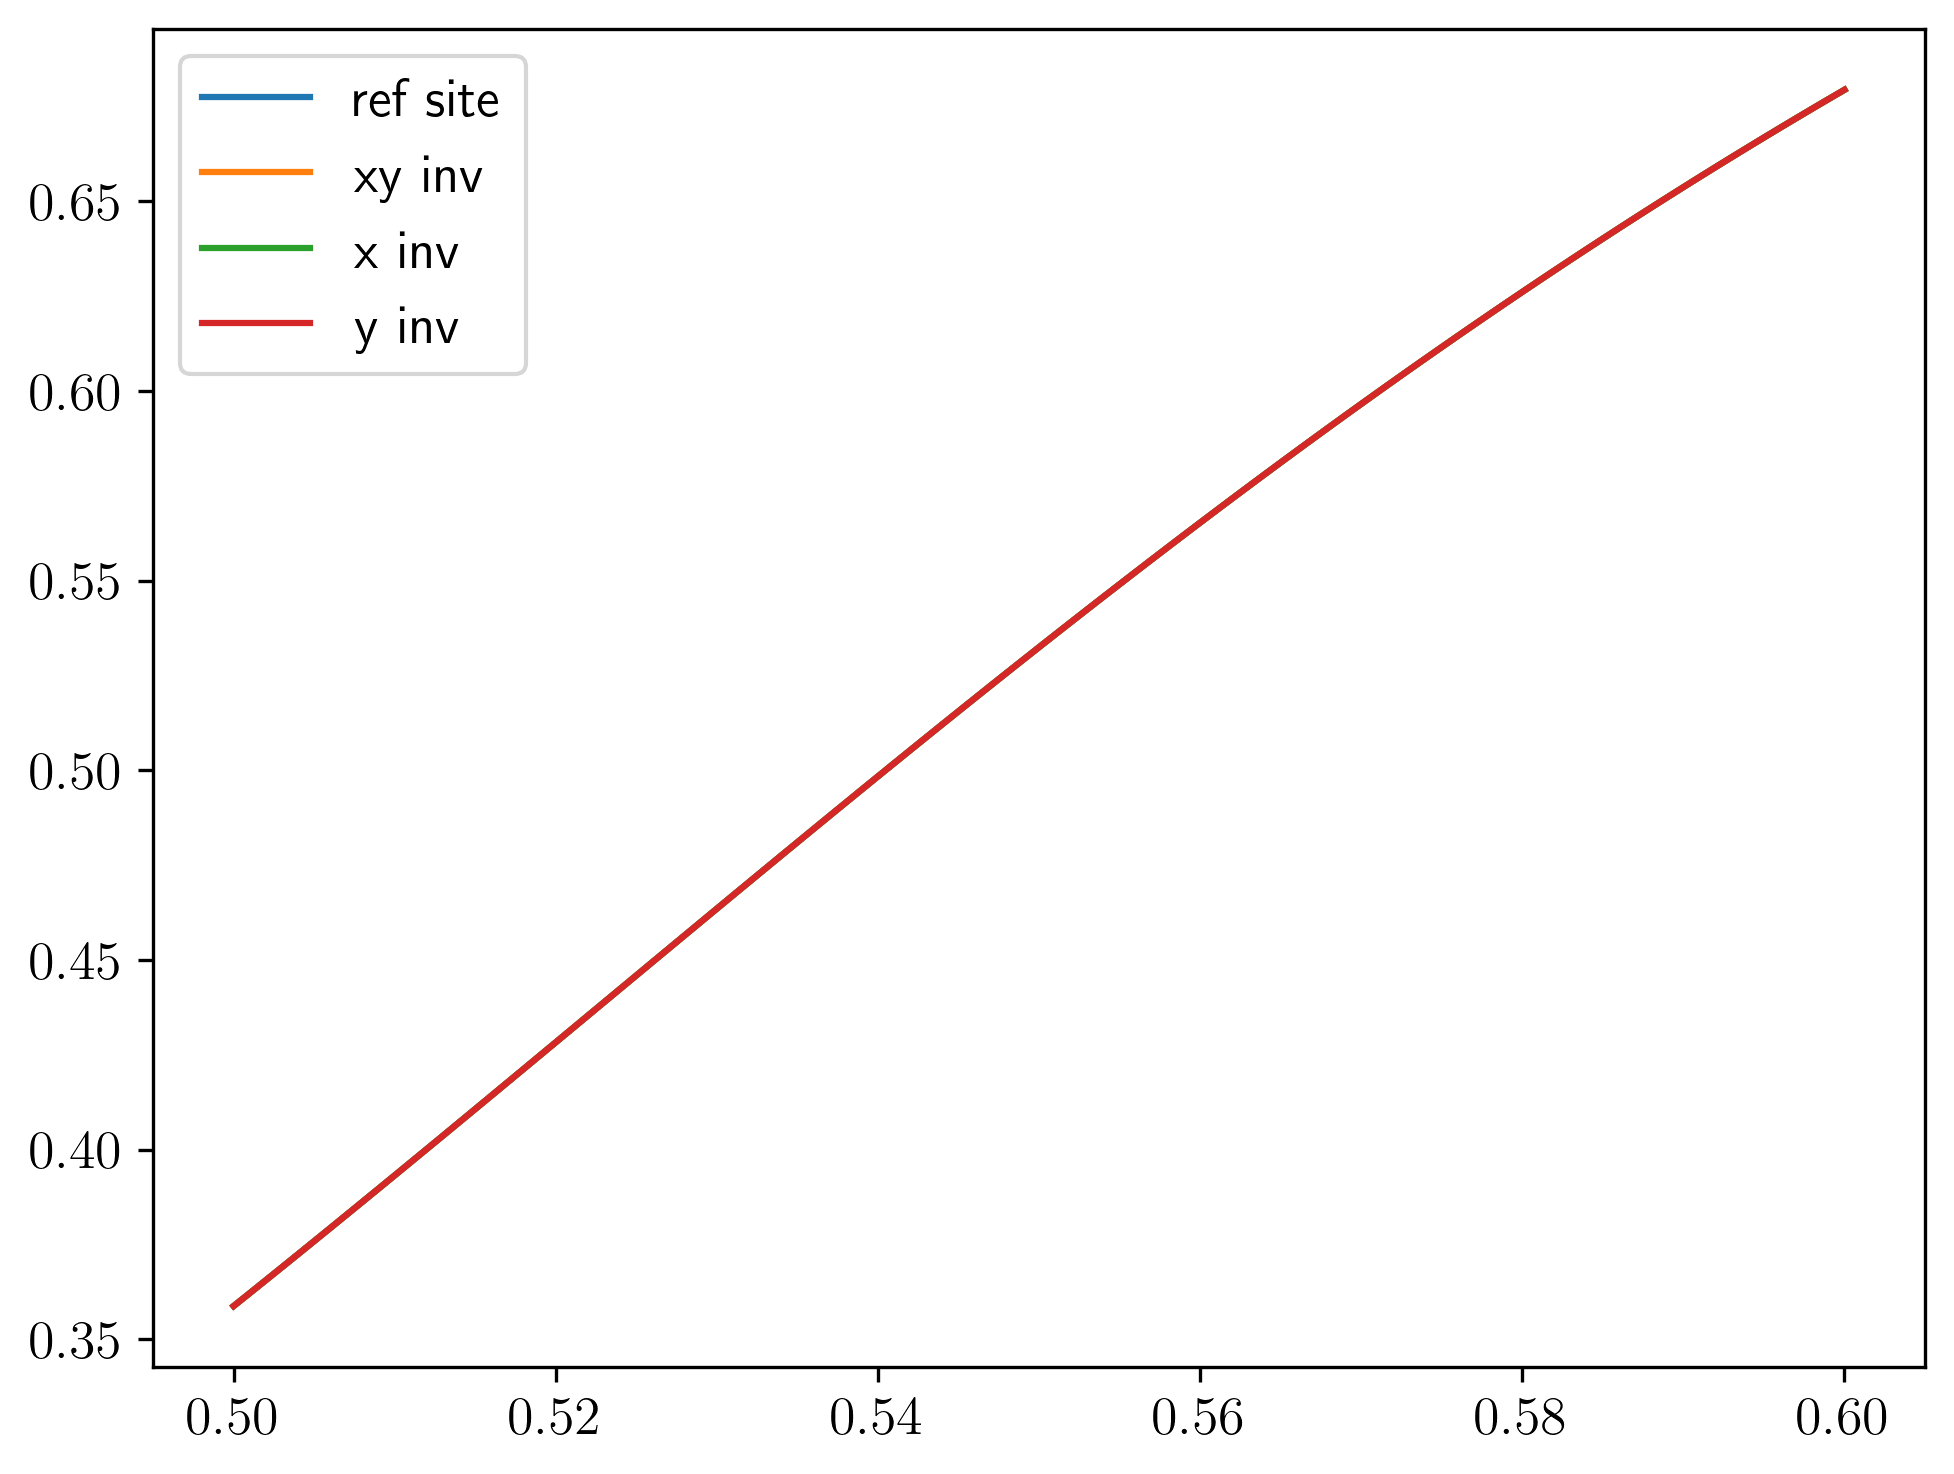

In [38]:
plot_compare_strings(ref_site, params)

## Observables with different Lattice sizes

### 1. t'Hooft String

In [15]:
def plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys):
    hs = np.linspace(h_i,h_f,npoints)
    # hs = np.logspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

    colors = create_sequential_colors(len(chis))
    i = 0
    for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
        l = L
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        plt.plot(hs, string, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
        i += 1

    plt.title(f"t'Hooft String of $Z_2$ different lattice sizes")
    plt.legend();
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


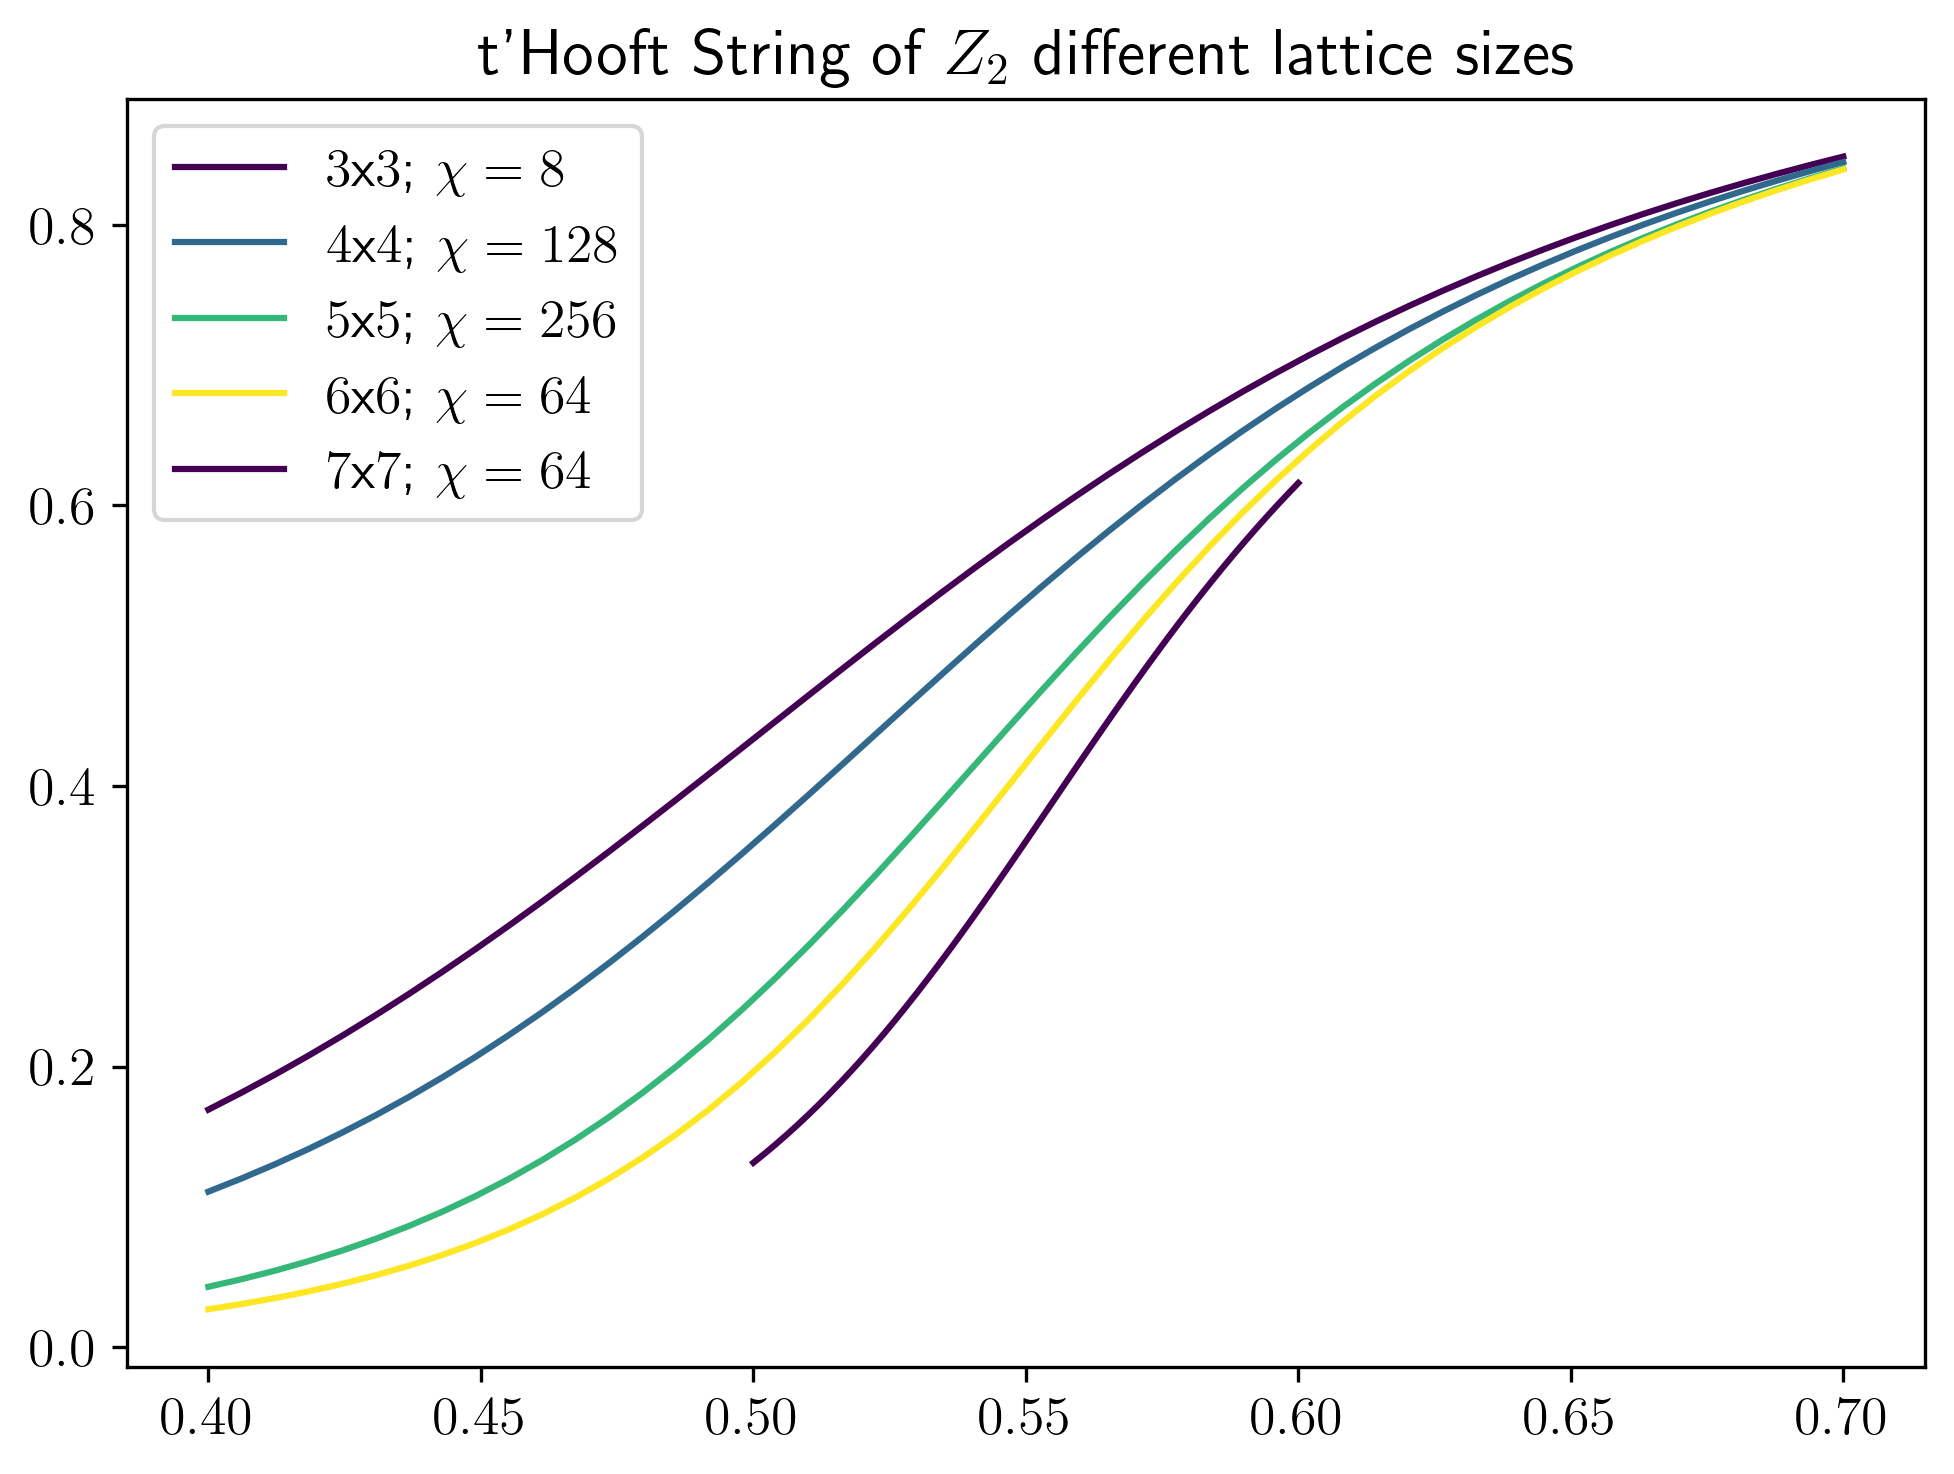

In [7]:
Ls = [3,4,5,6]
chis = [8,128,256,64]
h_i = 0.4
h_f = 0.7
lxs = [1,2,2,2]
lys = [1,1,2,2]
npoints = 50
plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys)
Ls = [7]
chis = [64]
h_i = 0.5
h_f = 0.6
lxs = [3]
lys = [3]
npoints = 51
plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys)

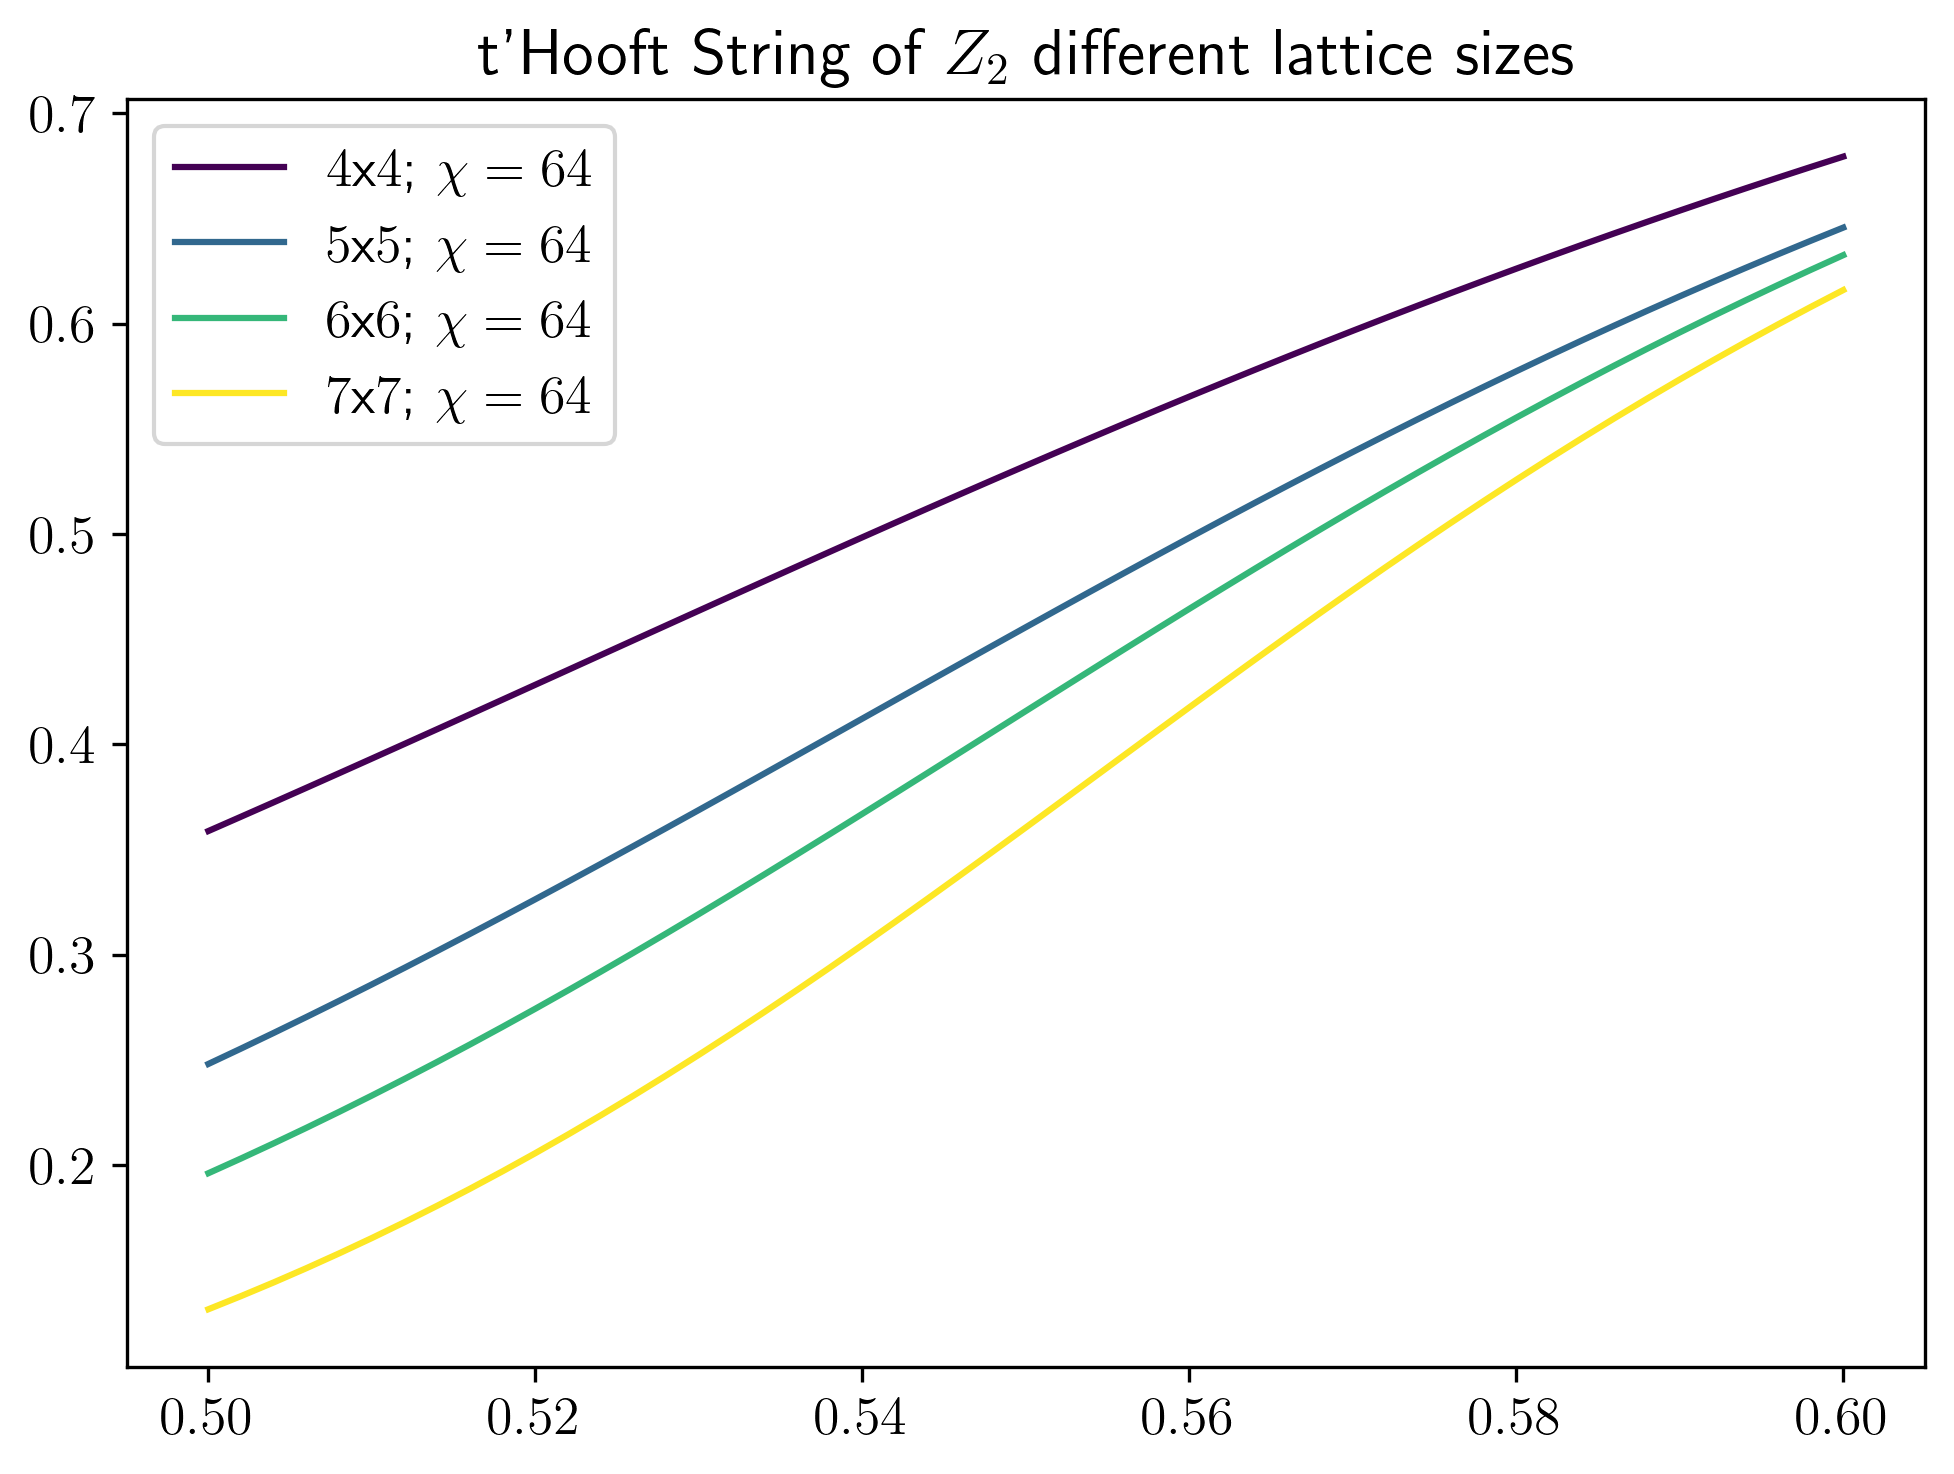

In [8]:
Ls = [4,5,6,7]
chis = [64,64,64,64]
h_i = 0.5
h_f = 0.6
lxs = [1,2,2,3]
lys = [1,2,2,3]
npoints = 51
plot_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys)

### Extracting $\gamma$ and $\nu$ from $g_c$ with a $Log$ law

We know that:
$$ \frac{dM}{dg}|_{h_{max}} \sim |g_c(L)-g_c(\infty)|^{-\gamma} \sim L^{\frac{\gamma}{\nu}}$$
where the derivative of the magnetization represents the susceptibility and the $\gamma, \nu$ *critical exponents* can be found with two formulas. 
1. In one formula we use the experimental value of $g_c^{exp}(\infty)=0.555$ extracted from the entropy maxima and the critical point for finite sizes $L$ to find $\nu$:
$$ |g_c(L)-g_c^{exp}(\infty)|^{-\gamma (\frac{-\nu}{-\nu})}=cL^{\frac{\gamma}{\nu}} $$
$$ \log(|g_c(L)-g_c^{exp}(\infty)|)=c + \frac{1}{\nu} \log(\frac{1}{L}) $$
2. Now we use the $\nu$ just found to get $\gamma$:
$$ \log(\frac{dM}{dg}|_{h_{max}}) = \log(cL^{\frac{\gamma}{\nu}})= \log(c)+\frac{\gamma}{\nu}\log(L)$$

In [70]:
def plot_derivative_thooft_string_lattices(Ls, chis, h_i, h_f, npoints, lxs, lys):
    colors = create_sequential_colors(len(chis))
    i = 0
    max_vals = []
    x_vals = []
    hs = np.linspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

    for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
        l = L
        string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        d_string_dh = np.gradient(string, hs)
        idx_max = np.argmax(d_string_dh)
        max_vals.append(np.max(d_string_dh))
        x_vals.append(hs[idx_max])
        plt.plot(hs, string, color=colors[i], linestyle='--', label=f"${l}$x${L}$; $\chi={chi}$")
        plt.plot(hs, d_string_dh, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$ Der")
        i += 1
    plt.scatter(x_vals, max_vals, marker='o', facecolors="white", edgecolors="red")
    plt.title(f"Derivative of t'Hooft String of $Z_2$ different lattice sizes")
    plt.savefig(f"{parent_path}/figures/thooft/thooft_string_derivative_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

    plt.legend();
    return max_vals, x_vals, d_string_dh

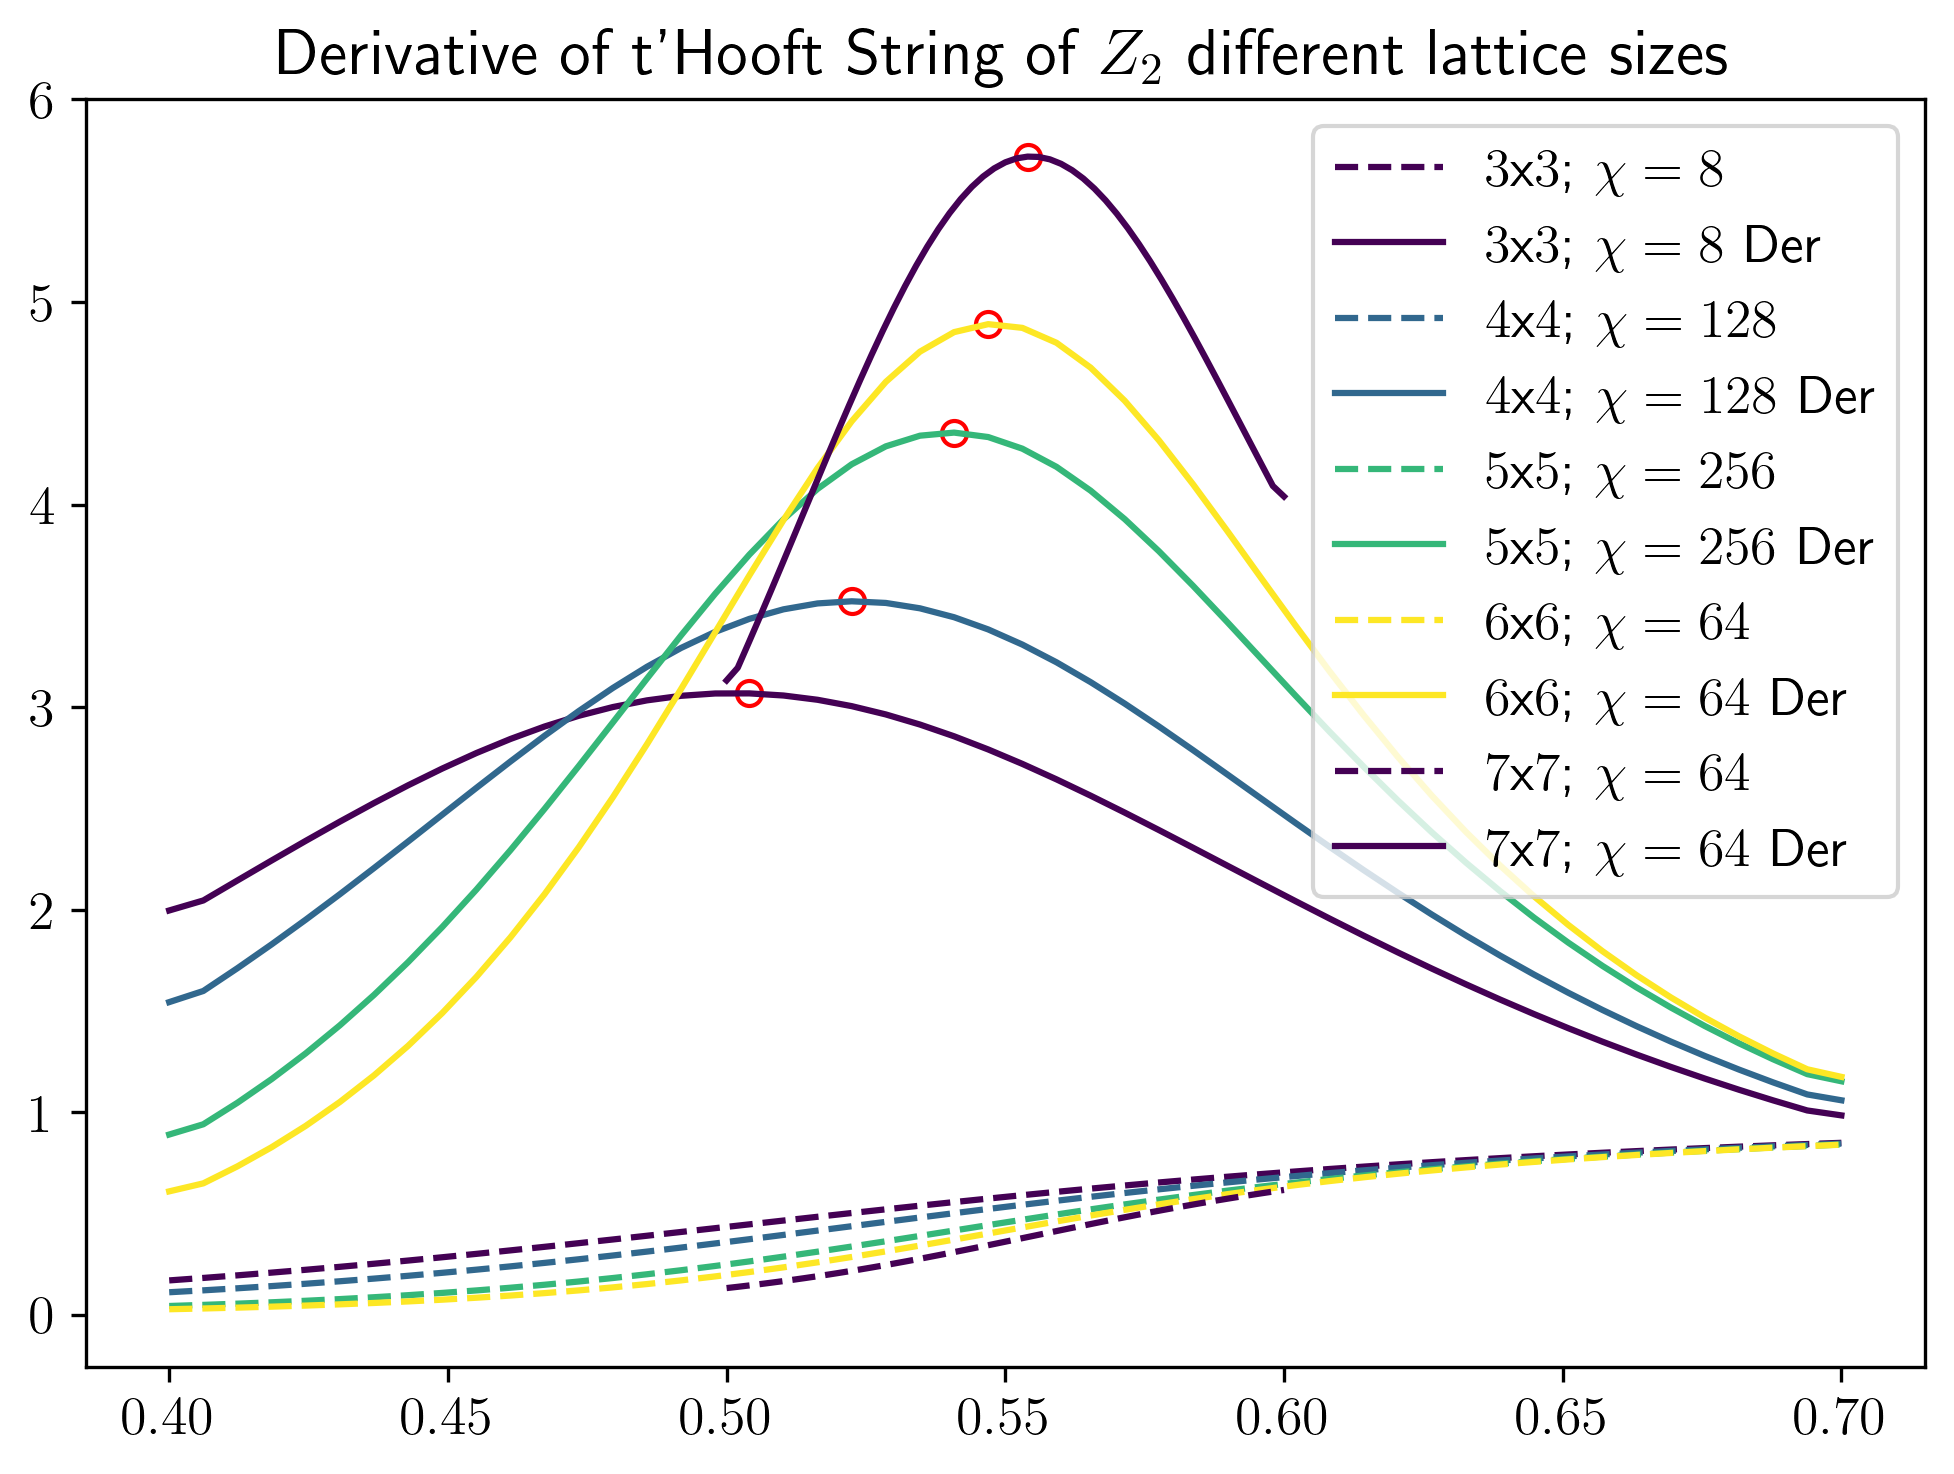

In [80]:
Ls1 = [3,4,5,6]
chis = [8,128,256,64]
h_i = 0.4
h_f = 0.7
lxs = [1,2,2,2]
lys = [1,1,2,2]
npoints = 50
max_vals_1, x_vals_1,_ = plot_derivative_thooft_string_lattices(Ls1, chis, h_i, h_f, npoints, lxs, lys)
Ls2 = [7]
chis = [64]
h_i = 0.5
h_f = 0.6
lxs = [3]
lys = [3]
npoints = 51
max_vals_2, x_vals_2,_ = plot_derivative_thooft_string_lattices(Ls2, chis, h_i, h_f, npoints, lxs, lys)

In [68]:
Ls2 = [4,5,6]
chis = [64,64,64]
h_i = 0.01
h_f = 1.0
lxs = [1,2,2]
lys = [1,2,2]
npoints = 101

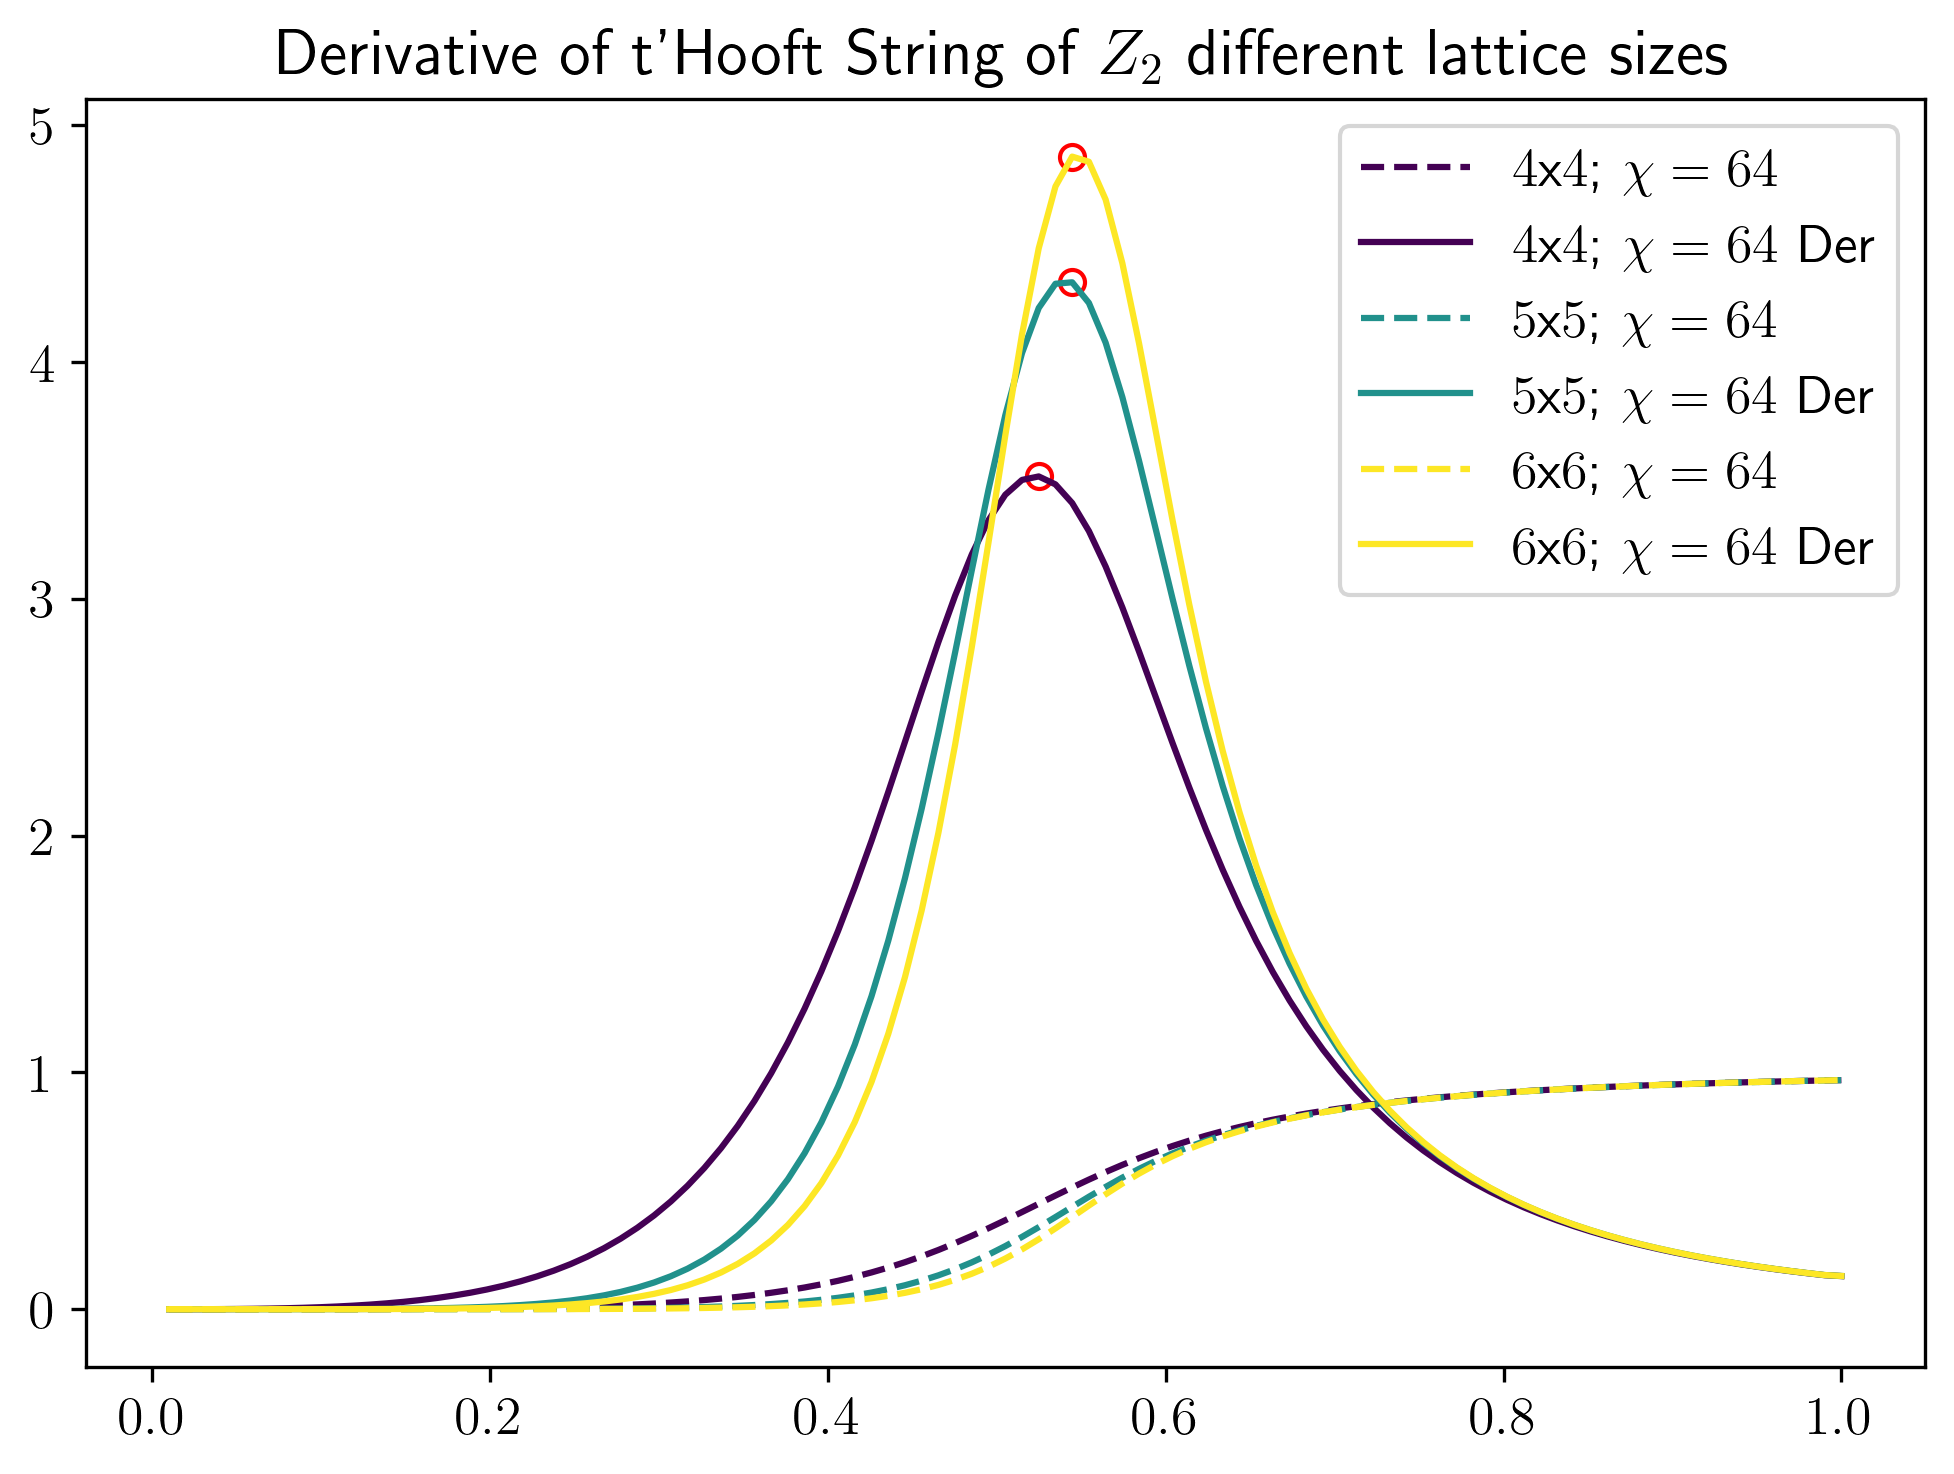

In [71]:

max_vals_2, x_vals_2, susceptibility = plot_derivative_thooft_string_lattices(Ls2, chis, h_i, h_f, npoints, lxs, lys)

In [72]:
def pow_law(L,b,c,x):
    return b - c*(L**x)

In [73]:
powp, powc = curve_fit(pow_law, x_vals_2, Ls2, maxfev=2000)
print(f"Critical g: {powp[0]}")
print(f"nu: {-1/powp[2]}")

Critical g: -14.81279159870235
nu: -0.4827601005805972


/var/folders/pb/r6cqvt7968zcz7c91mxxvzn40000gv/T/ipykernel_19671/11085366.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  powp, powc = curve_fit(pow_law, x_vals_2, Ls2, maxfev=2000)


### Data collapse

In [83]:
print(x_vals_1, x_vals_2)
x_vals = x_vals_1 + x_vals_2
max_vals = max_vals_1 + max_vals_2
Ls = Ls1 + Ls2
print(x_vals)

[0.5040816326530613, 0.5224489795918368, 0.5408163265306123, 0.5469387755102041] [0.554]
[0.5040816326530613, 0.5224489795918368, 0.5408163265306123, 0.5469387755102041, 0.554]


In [91]:
Ls.pop(0)
x_vals.pop(0)
max_vals.pop(0)

3.5222492432091457

In [92]:
powp, powc = curve_fit(pow_law, x_vals, Ls, maxfev=2000)
print(f"Critical g: {powp[0]}")
print(f"nu: {-1/powp[2]}")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2000.

g_crit:  0.5859234231622725 nu:  4.391872379626267


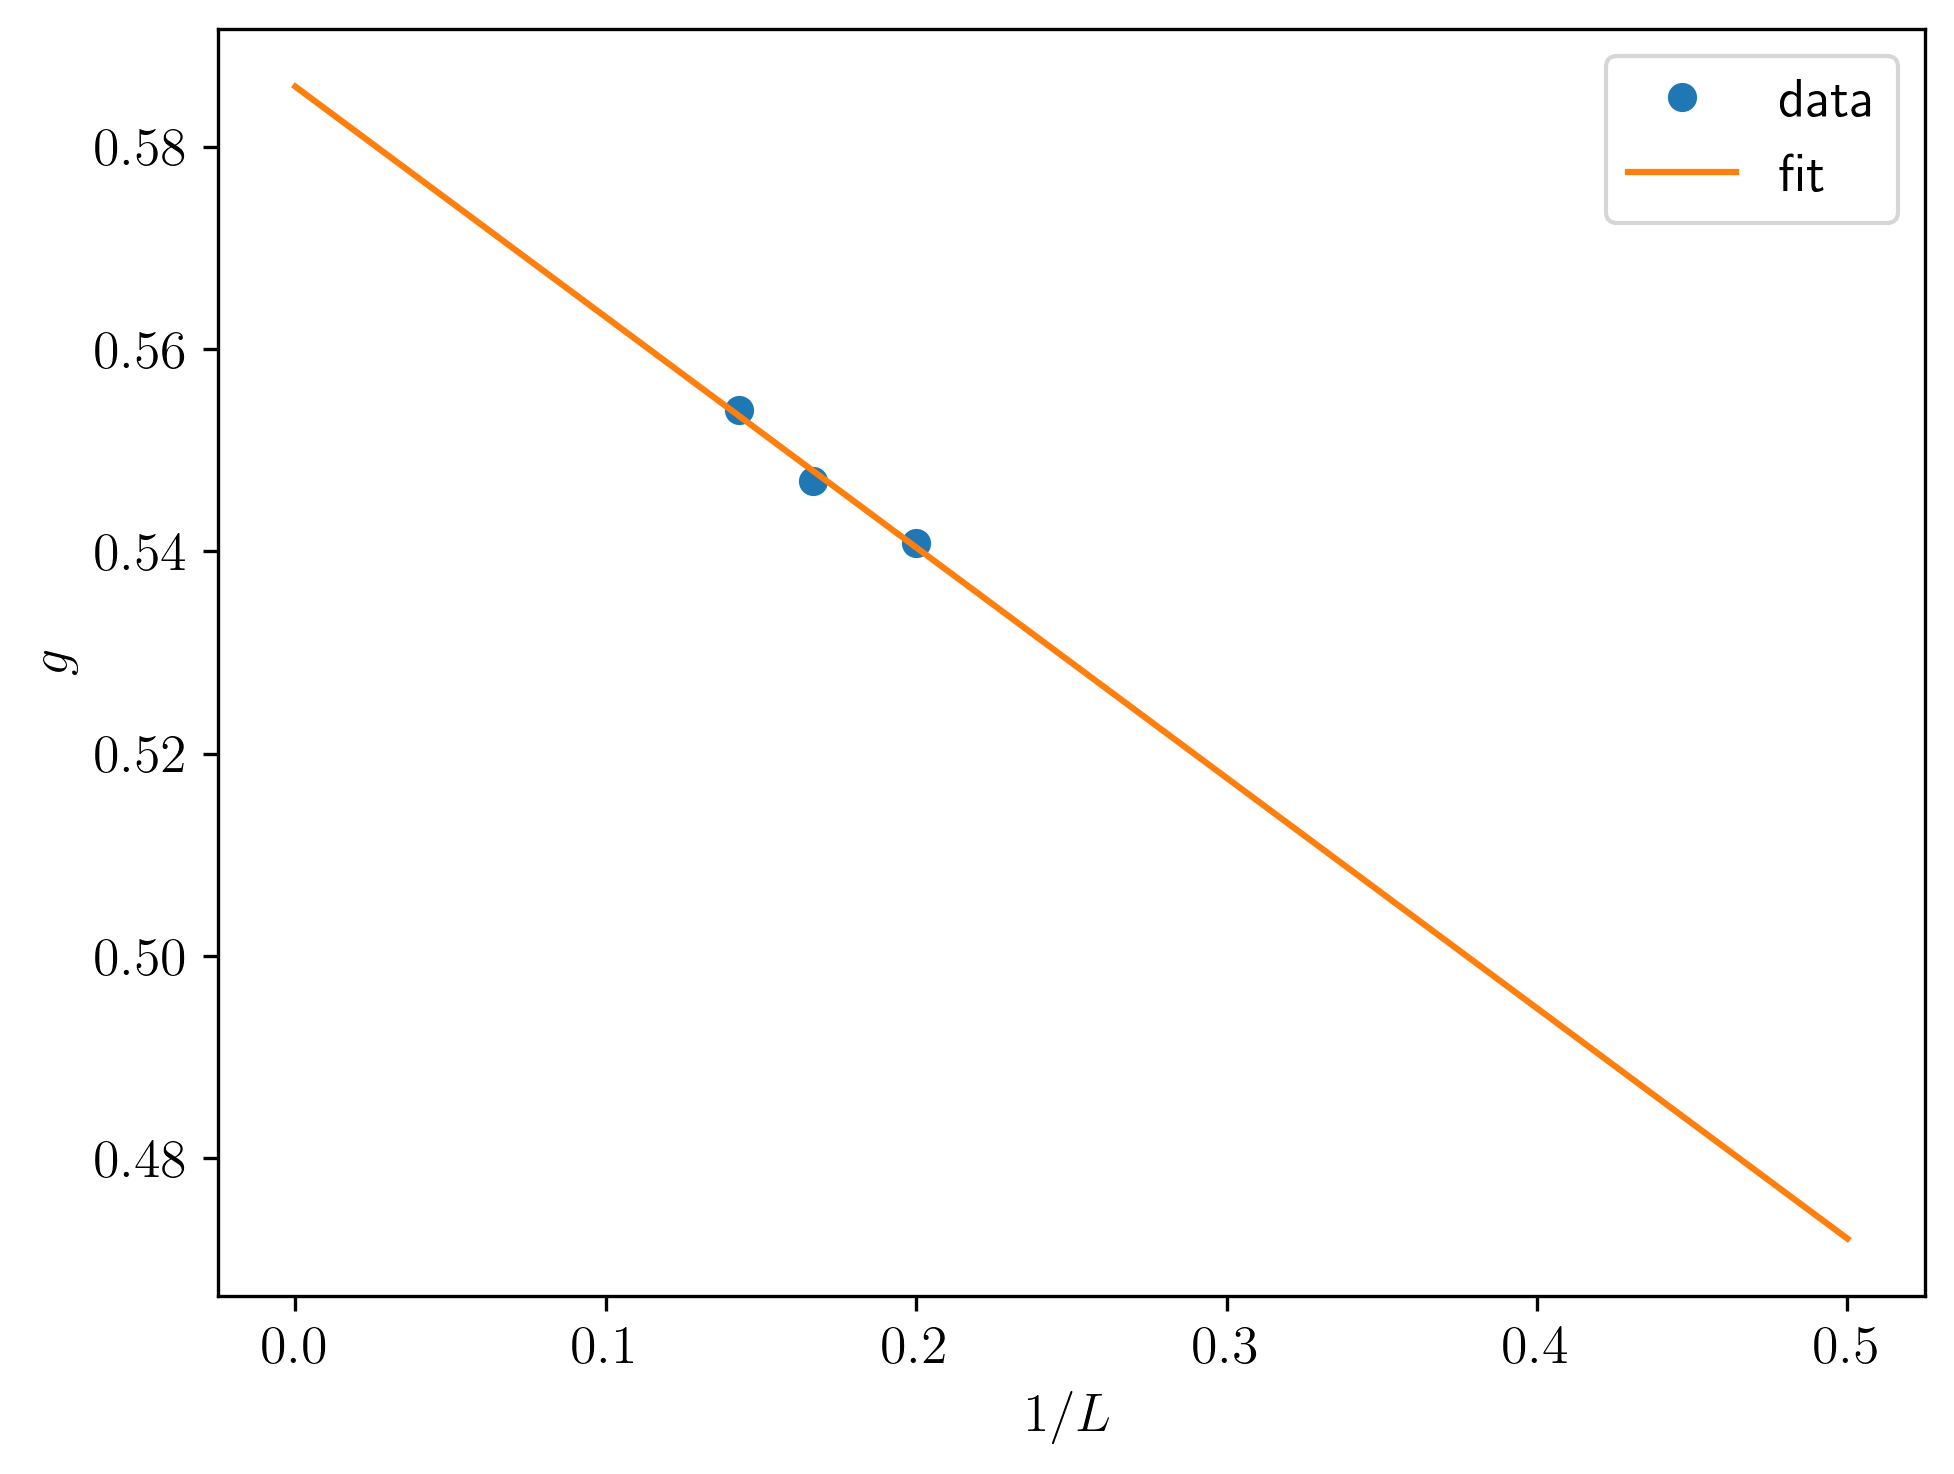

In [97]:
def lin_law(x,a,b):
    return a*x+b

Ls_inv = 1/np.asarray(Ls)
p, c = curve_fit(lin_law, Ls_inv, x_vals)
xs = np.linspace(0,0.5)
plt.plot(Ls_inv, x_vals, 'o', label="data")
plt.plot(xs, lin_law(xs, p[0], p[1]), label="fit")
plt.xlabel("$1/L$")
plt.ylabel("$g$")
plt.legend()
print("g_crit: ", p[1], "nu: ", -1/p[0])

In [ ]:
def lin_law(x,a,b):
    return a*x+b

def power_law(L, a, b, c):
    return a + b*(L**c)

# find nu and gc
x_data = Ls2
y_data = x_vals_2
popt_power, copt_power = curve_fit(power_law, x_data, y_data, maxfev=5000)
print(f"the nu: {-1/popt_power[2]}")
print(f"the gc_pow: {popt_power[0]}")

# find nu
x_data = np.log(np.abs(1/np.asarray(Ls)))
h_th = 1/np.sqrt(3.044)
print(f"the gc_th: {h_th}")

y_data = np.log(np.abs(np.asarray(x_vals_2)-h_th))
popt_log_th, copt_log_th = curve_fit(lin_law, x_data, y_data)
print(f"3: The nu with g_th is: {1/popt_log_th[0]}")

y_data = np.log(np.abs(np.asarray(x_vals_2)-0.56))
popt_log_pow, copt_log_pow = curve_fit(lin_law, x_data, y_data)
print(f"3: The nu with g_pow is: {1/popt_log_pow[0]}")

# first method
x_data = np.log(np.abs(np.asarray(x_vals)-h_th))
y_data = np.log(np.abs(max_vals))

popt_log_1, copt_log_1 = curve_fit(lin_law, x_data, y_data)
print(f"The gamma is: {-popt_log_1[0]}")

# second method
x_data = np.log(1/np.asarray(Ls))
y_data = np.log(np.abs(max_vals))

popt_log_2, copt_log_2 = curve_fit(lin_law, x_data, y_data)
print(f"The gamma is: {popt_log_2[0]*(-1/popt_power[2])}")

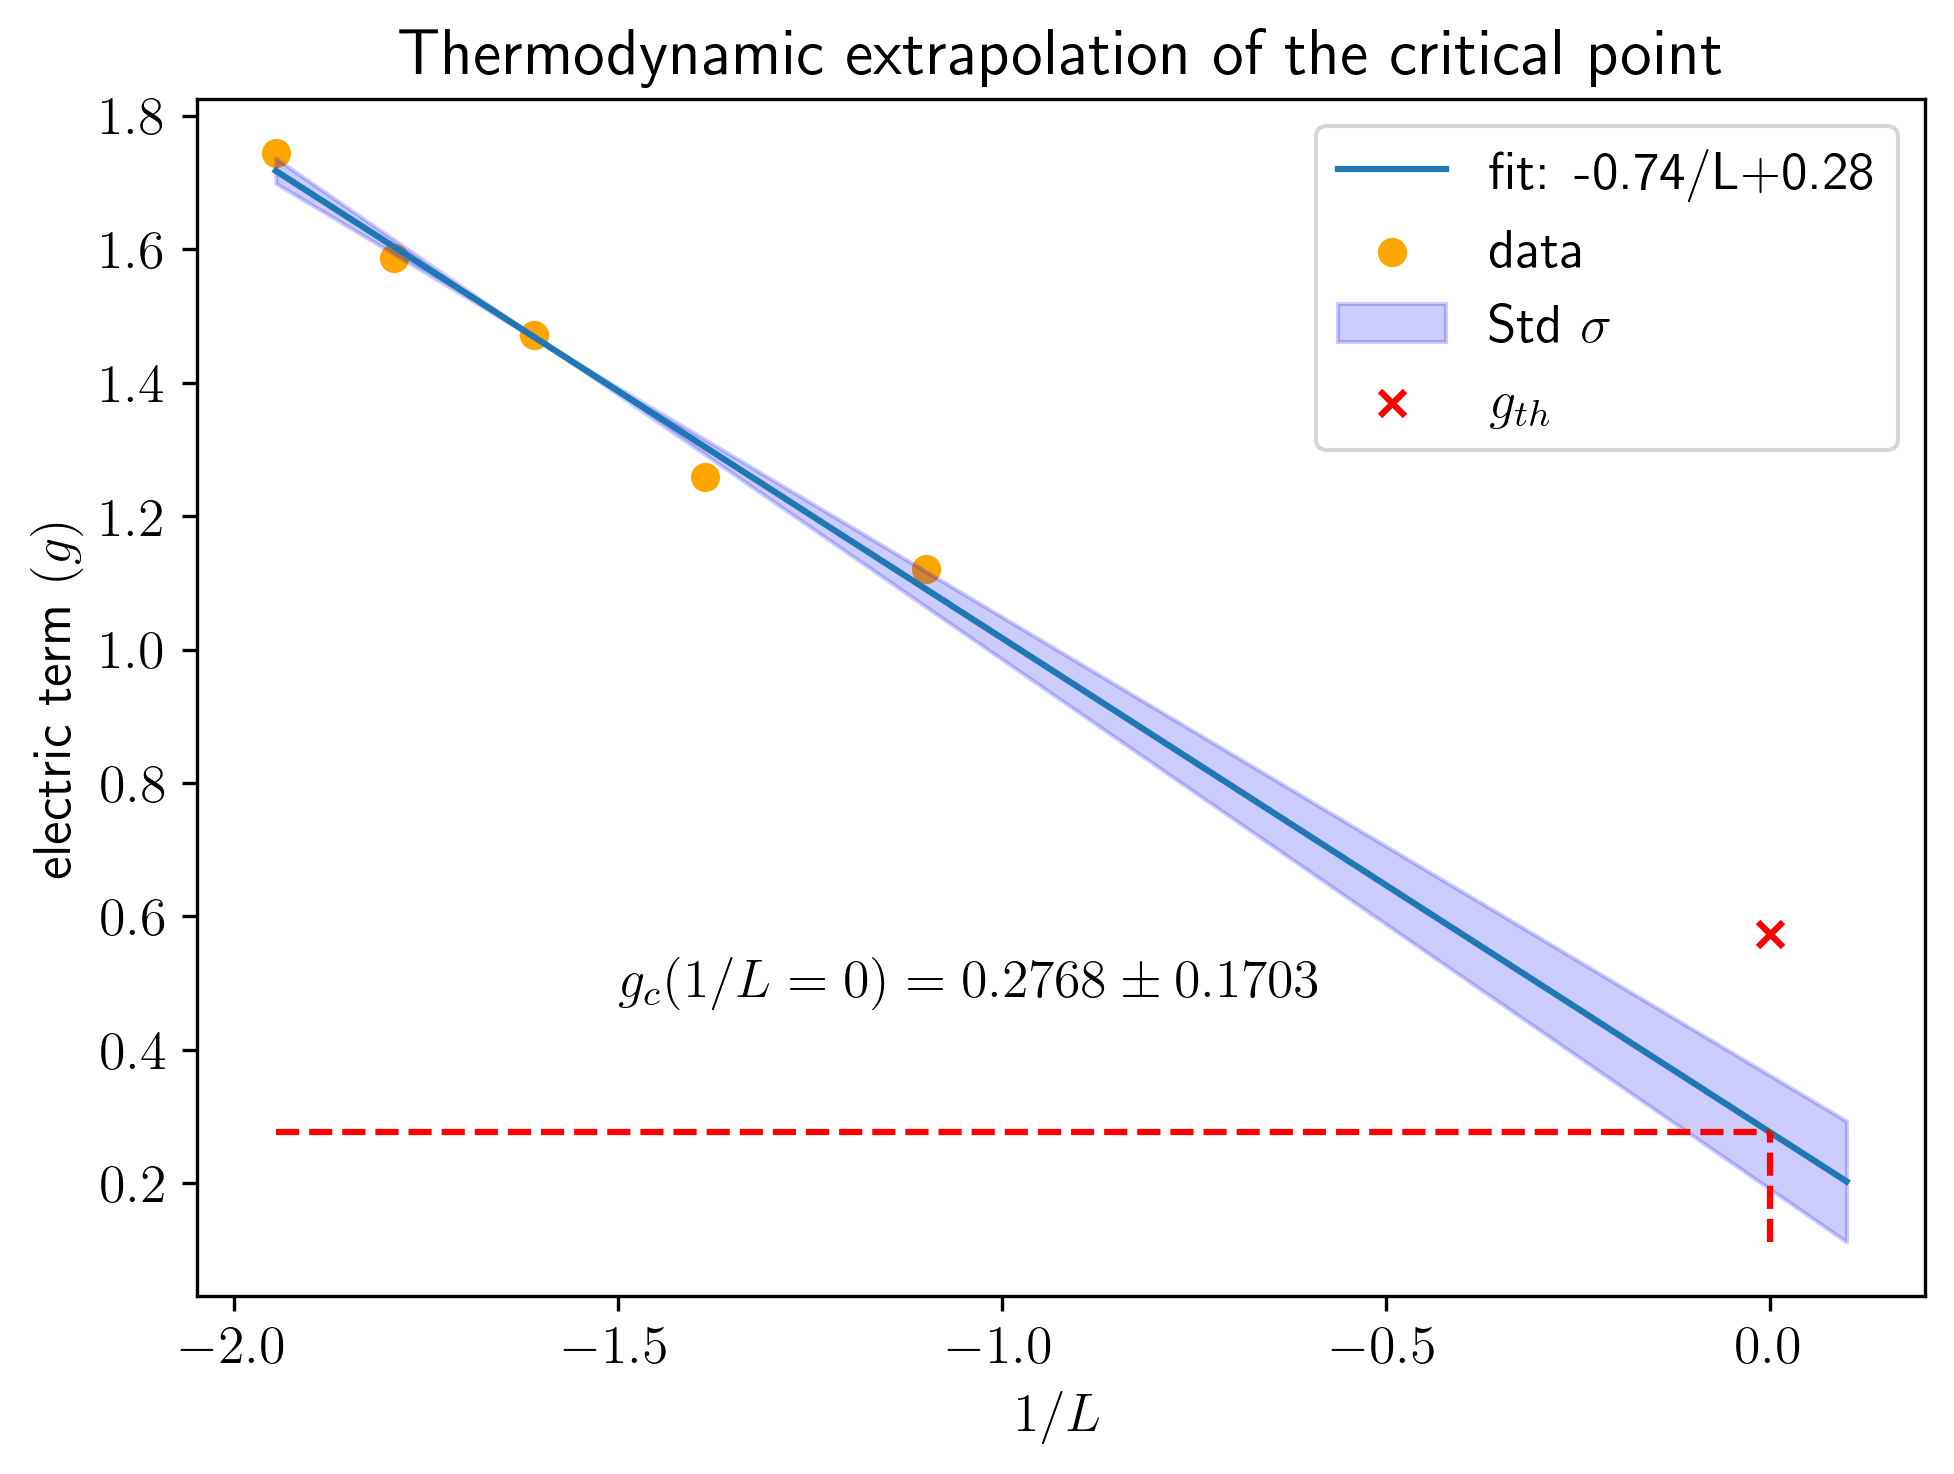

In [ ]:
entr_max = []
idx_max = []
Ls_inv = [1/3,1/4,1/5,1/6,1/7]
g_th = 1/np.sqrt(3.044)

x_data = np.log(np.abs(Ls_inv))
y_data = np.log(np.abs(max_vals))

p_opt, c_opt = curve_fit(lin_law, x_data, y_data)

xs = np.linspace(x_data[-1],0.1,50)
y_fit = lin_law(xs, p_opt[0], p_opt[1])
err = np.sqrt(np.diag(c_opt))
y_err_plus = lin_law(xs, p_opt[0]+err[0], p_opt[1]+err[1])
y_err_minus = lin_law(xs, p_opt[0]-err[0], p_opt[1]-err[1])
plt.title("Thermodynamic extrapolation of the critical point")
plt.plot(xs, y_fit, label=f'fit: {round(p_opt[0],2)}/L+{round(p_opt[1],2)}')
plt.scatter(x_data, y_data, color='orange', label='data')
h_c = round(lin_law(x=0,a=p_opt[0],b=p_opt[1]),4)
h_c_err_plus = round(lin_law(x=0,a=p_opt[0]+err[0],b=p_opt[1]+err[1]),4)
h_c_err_minus = round(lin_law(x=0,a=p_opt[0]-err[0],b=p_opt[1]-err[1]),4)
h_c_err = round(h_c_err_plus - h_c_err_minus, 4)
plt.text(x=-1.5, y=0.48, s=f"$g_c(1/L=0)={h_c}\pm{h_c_err}$")
plt.hlines(y=h_c, xmin=xs[0], xmax=0, linestyles='--', colors='red')
plt.vlines(x=0, ymin=y_err_minus[-1], ymax=h_c, linestyles='--', colors='red')
plt.fill_between(xs, y_err_minus, y_err_plus, color='blue', alpha=0.2, label='Std $\sigma$')
plt.scatter([0], [g_th], marker='x', color='red', label='$g_{th}$')
plt.xlabel("$1/L$")
plt.ylabel("electric term $(g)$")

plt.legend()
plt.show();

In [ ]:
p_opt

array([-0.74032456,  0.27678827])

The slope of the curve is 3.579900081261434
So that nu is 0.2793374053187636
The th value is 0.629971(4)


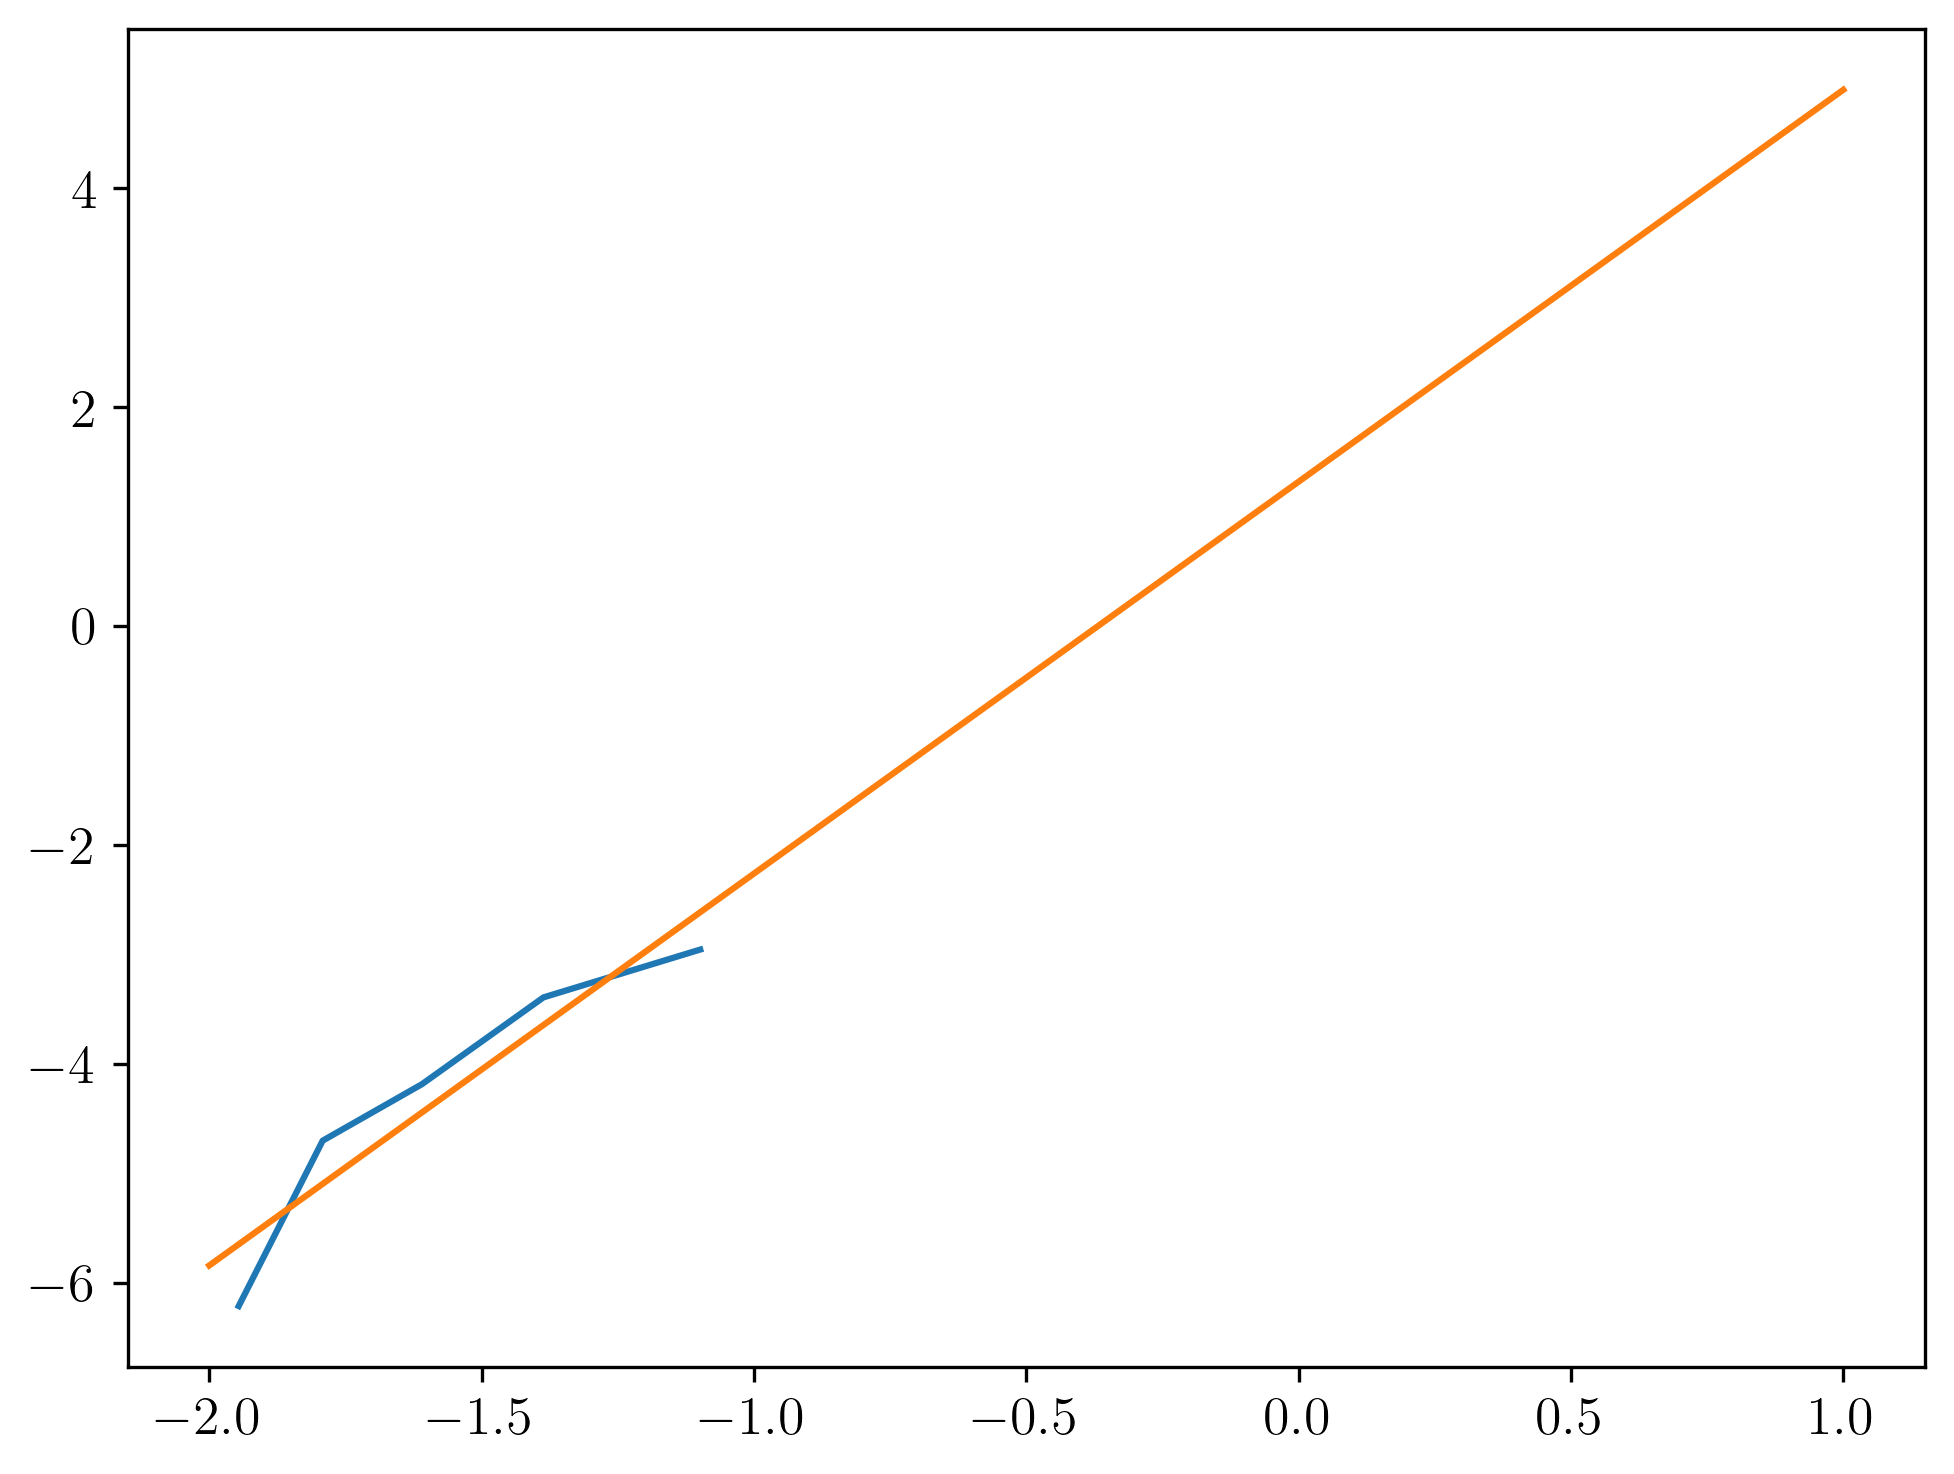

In [ ]:
y_data = np.log(np.abs(np.asarray(x_vals)-0.556))

x_data = np.log(Ls_inv)
x_data

plin, _ = curve_fit(lin_law, xdata=x_data, ydata=y_data)
xs = np.linspace(-2, 1, 50)
plt.plot(x_data,y_data)
plt.plot(xs, lin_law(xs, plin[0], plin[1]))
print(f"The slope of the curve is {plin[0]}")
print(f"So that nu is {1/plin[0]}")
print(f"The th value is 0.629971(4)")

### 2. Binder's Cumulant

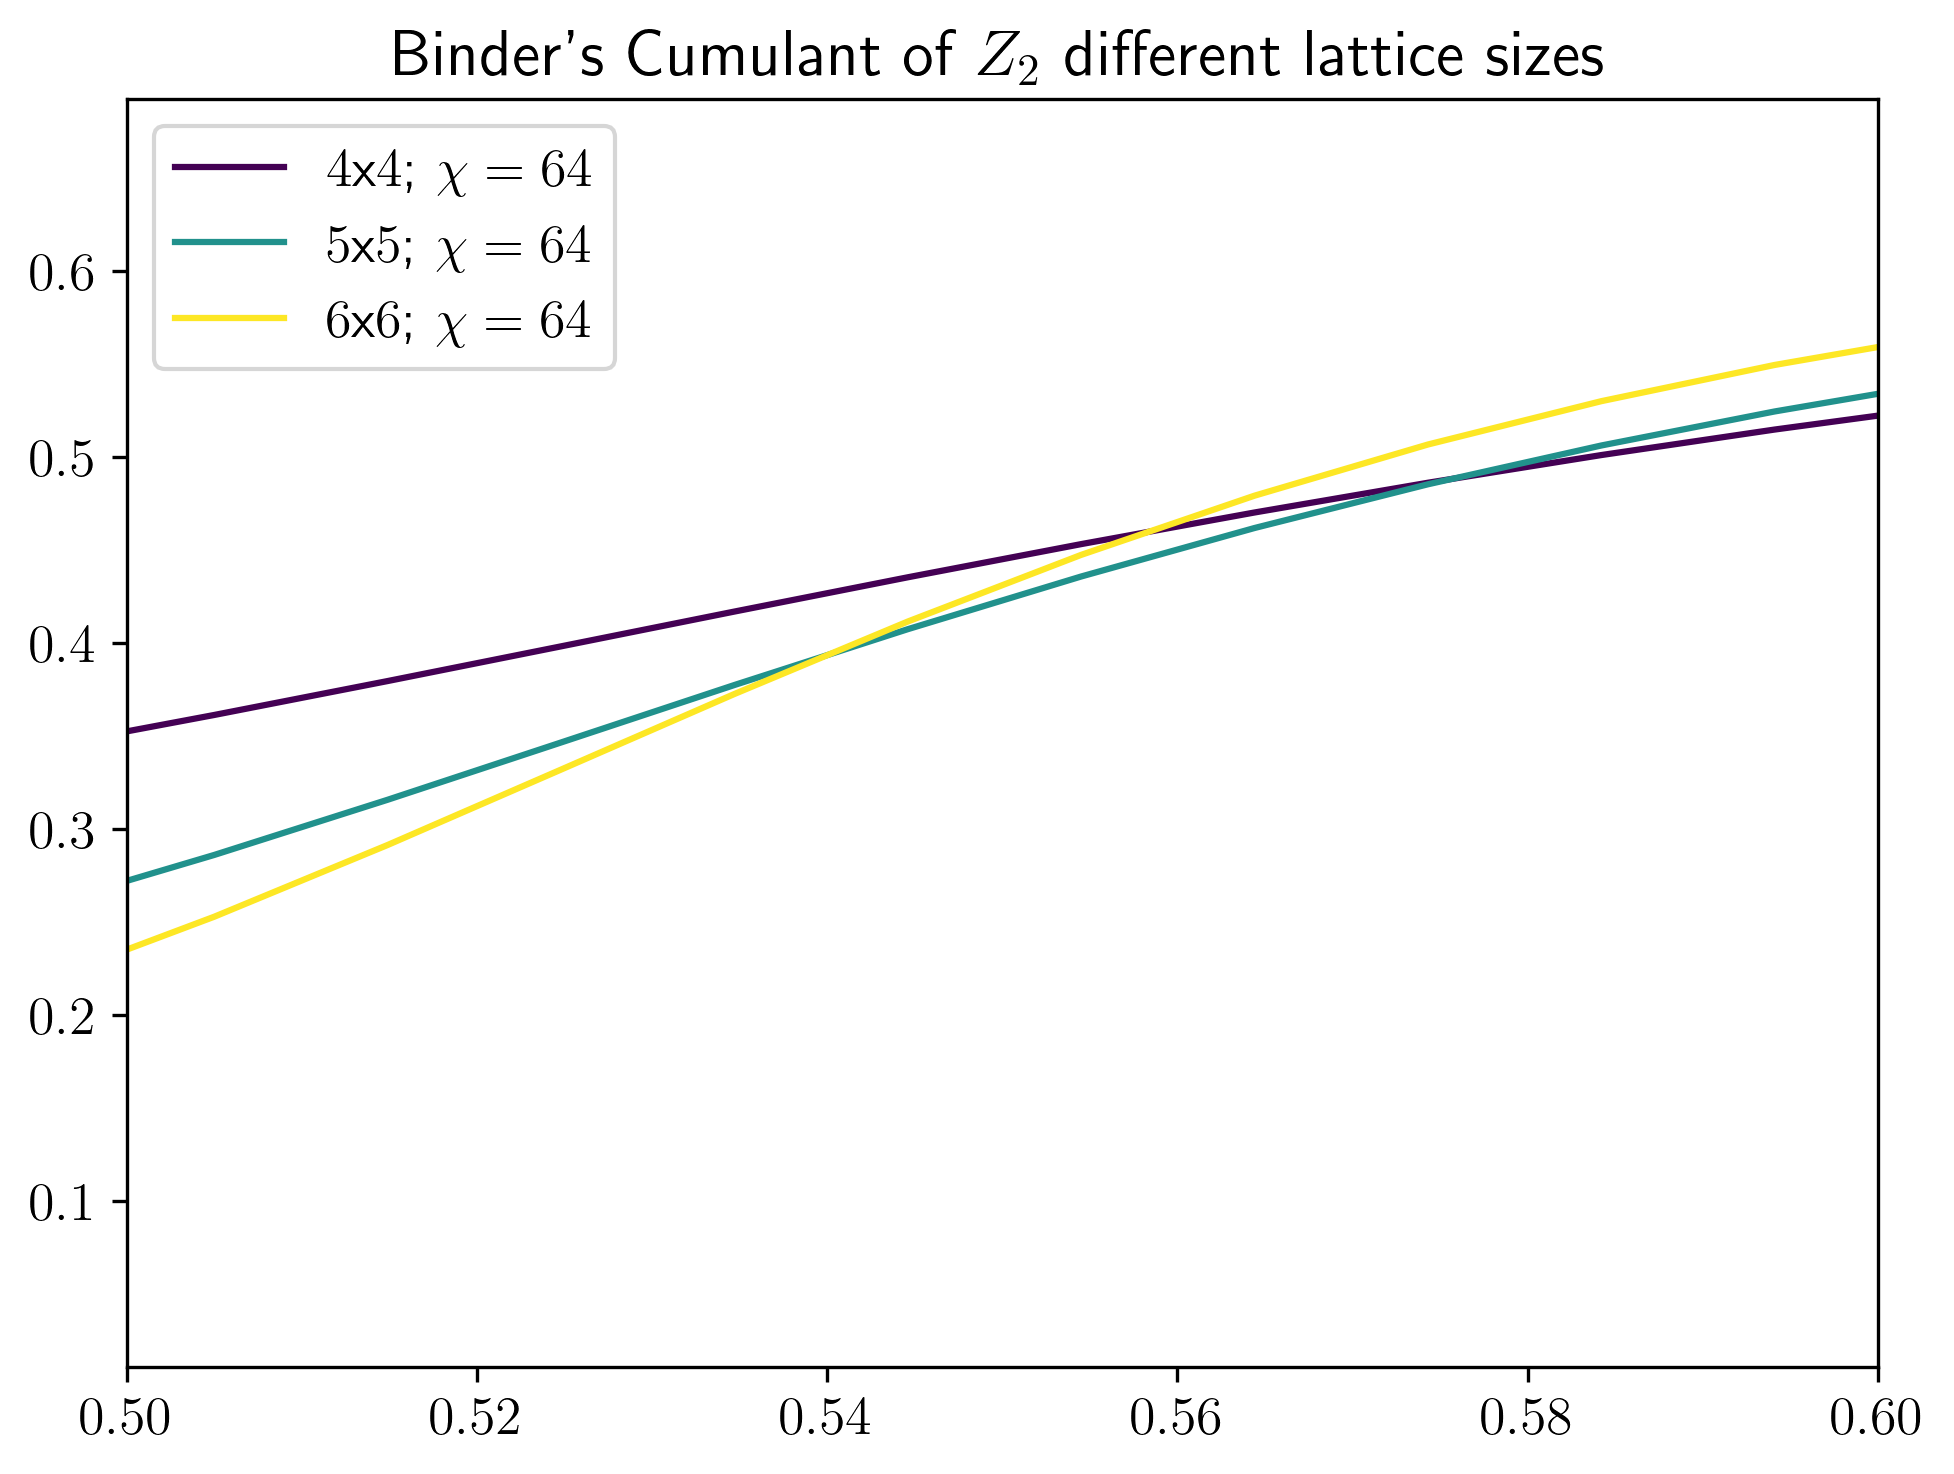

In [48]:
Ls = [4,5,6]
chis = [64,64,64]
h_i = 0.01
h_f = 1.0
npoints = 101
hs = np.linspace(h_i,h_f,npoints)
# hs = np.logspace(h_i,h_f,npoints)
cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

colors = create_sequential_colors(len(chis))
i = 0
for L, chi in zip(Ls, chis):
    l = L
    string2 = np.load(f"{parent_path}/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    string4 = np.load(f"{parent_path}/results/mag_data/dual_mag_fourth_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    bc = binders_cumul(fourth_m=string4, sm=string2)
    plt.plot(hs, bc, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
    i += 1

plt.xlim((0.5,0.6))
plt.title(f"Binder's Cumulant of $Z_2$ different lattice sizes")
plt.legend();
plt.savefig(f"{parent_path}/figures/critical_exponents/binders_cumulant_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")


### 3. Wilson Loop

In [90]:
def plot_wilson_loop(Ls, chis, h_i, h_f, npoints, loops_sites):
    hs = np.linspace(h_i,h_f,npoints)
    # hs = np.logspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

    colors = create_sequential_colors(len(chis))
    i = 0
    loops = []
    markers = ['1','2','3','4','+','o','x','.','v']
    for L, chi, lps, marker in zip(Ls, chis, loops_sites, markers):
        l = L
        lx, ly = lps
        loop = np.load(f"{parent_path}/results/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        plt.plot(hs, loop, color=colors[i], marker=marker, label=f"$W_{i+1}$")
        i += 1
        loops.append(loop)

    plt.title(f"Wilson Loop of $Z_2$ different plaquette sizes")
    plt.legend();
    plt.savefig(f"{parent_path}/figures/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")
    return loops

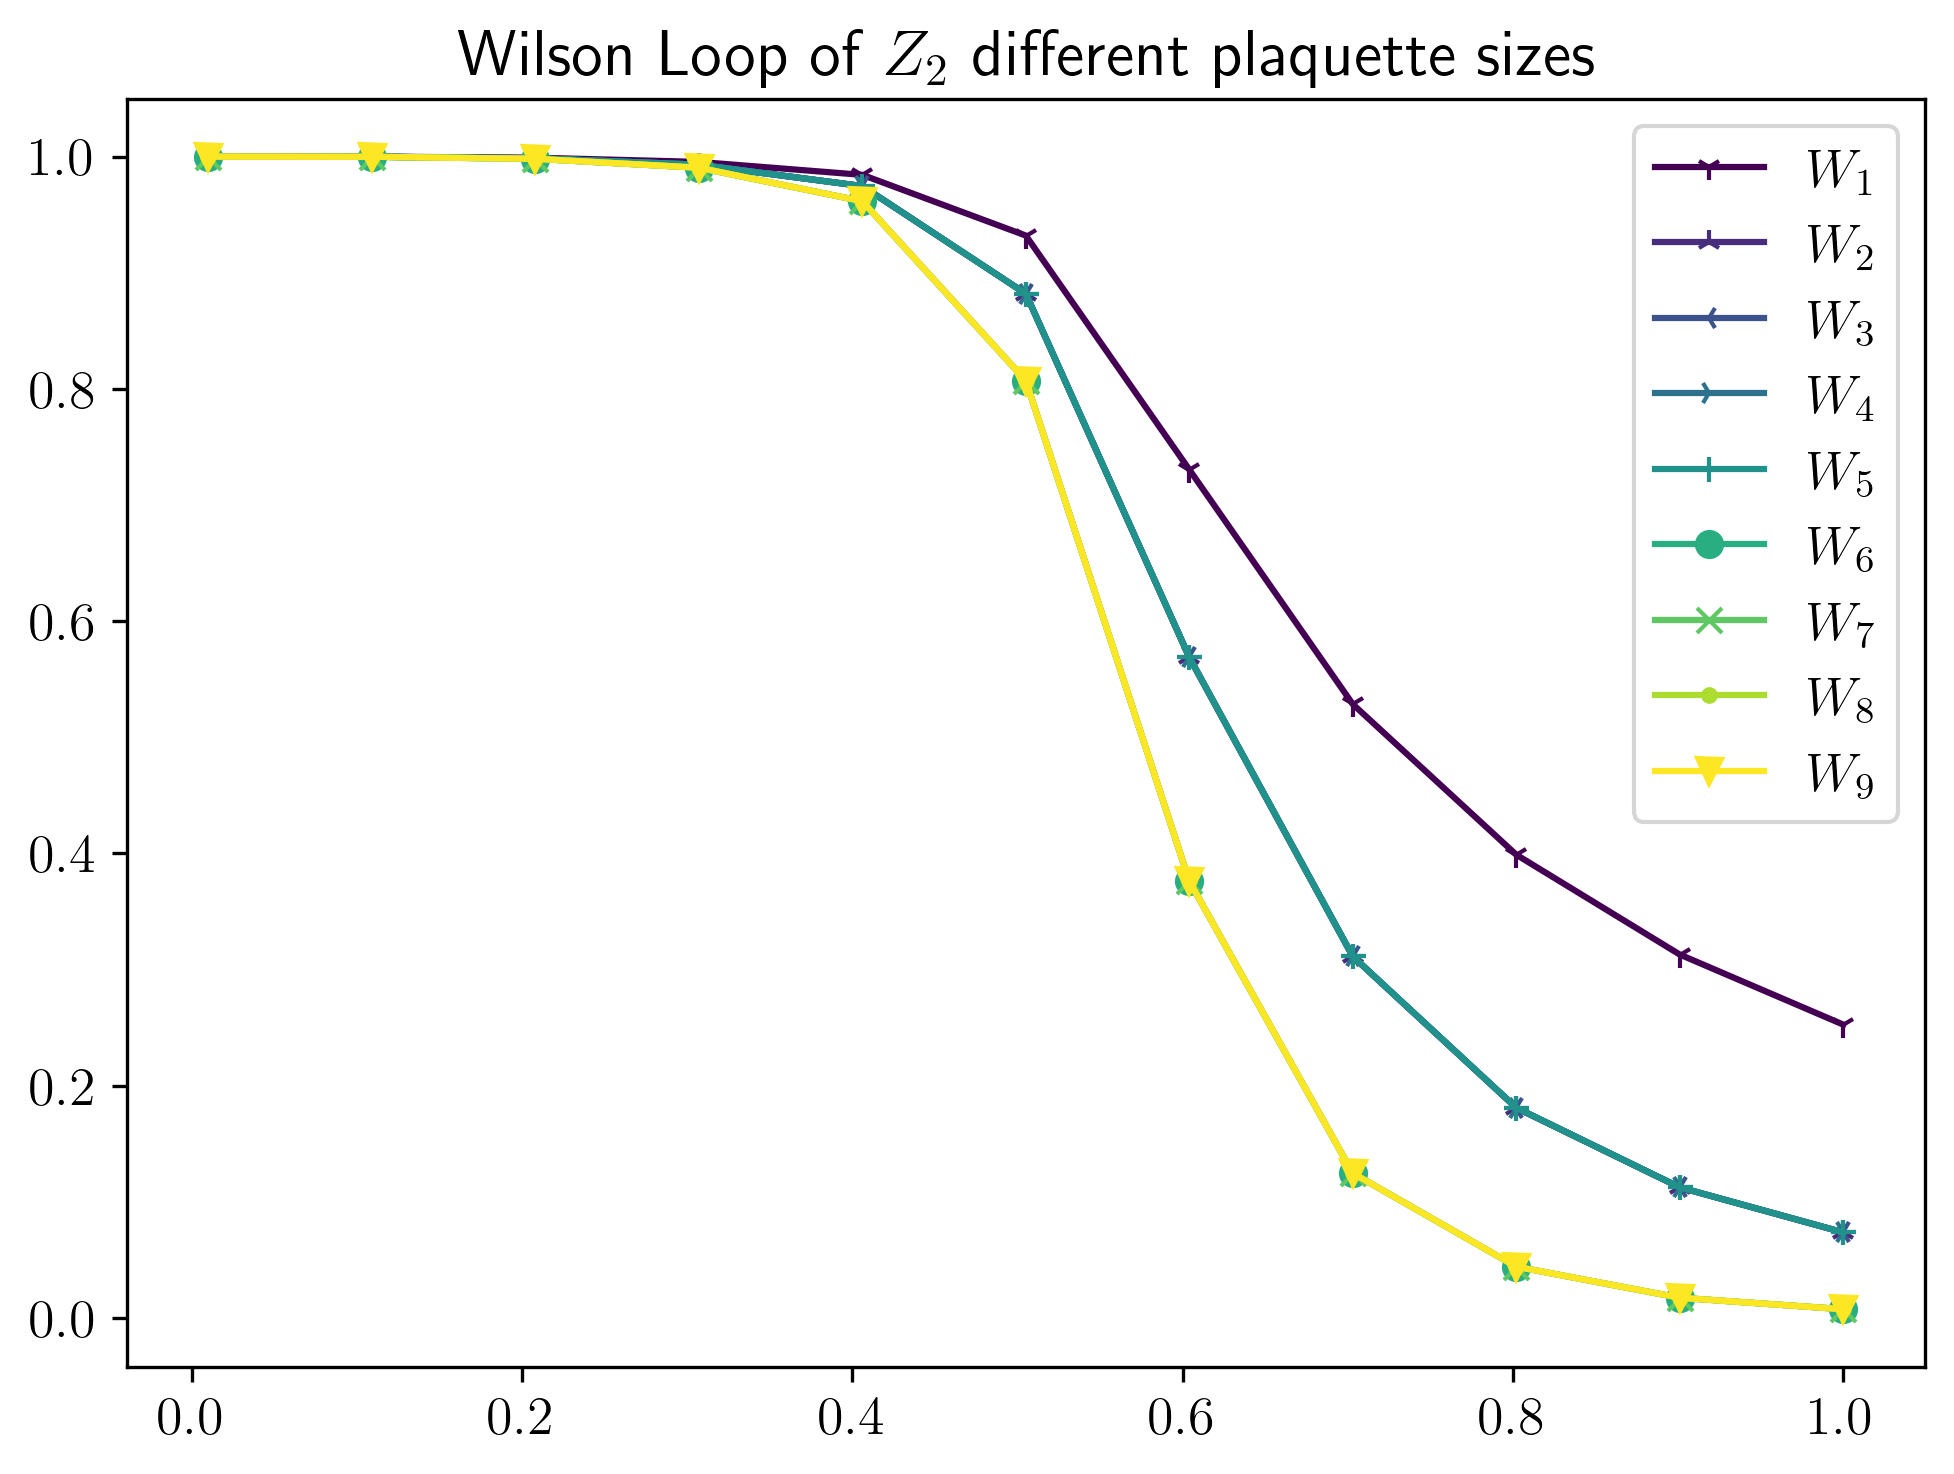

In [91]:
# lxs = [[3],[3],[3,4],[3],[2,3],[2,3],[3,4],[2,3],[3,4]]
# lys = [[3],[2,3],[3],[3,4],[3],[2,3],[2,3],[3,4],[3,4]]
loops_sites = [([2],[2]),
               ([2],[1,2]),
               ([2],[2,3]),
               ([1,2],[2]),
               ([2,3],[2]),
               ([1,2],[1,2]),
               ([2,3],[1,2]),
               ([1,2],[2,3]),
               ([2,3],[2,3])]
Ls = [5]*len(lxs)
h_i = 0.01
h_f = 1.0
npoints = 11
chis = [32]*len(lxs)
loops = plot_wilson_loop(Ls, chis, h_i, h_f, npoints, loops_sites)

### Creutz Ratio

In [118]:
def load_loop(L, chi, loop_sites):
    lx, ly = loop_sites
    l = L
    def loop_fn(**kwparams):
        h_i = kwparams.get('h_i')
        h_f = kwparams.get('h_f')
        npoints = kwparams.get('npoints')
        cx = kwparams.get('cx', None)
        cy = kwparams.get('cy', None)
        sector = kwparams.get('sector', 'vacuum_sector')
        return np.load(f"{parent_path}/results/wilson_loops/wilson_loop_first_moment_{lx}-{ly}_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    return loop_fn

def creutz_ratio(L, chi, loop_sites, dir_x, dir_y):
    lx, ly = loop_sites
    if dir_x == +1:
        lx_ext = lx + [lx[-1]+1]
    else:
        lx_ext = [lx[0] - 1] + lx
    if dir_y == +1:
        ly_ext = ly + [ly[-1]+1]
    else:
        ly_ext = [ly[0] - 1] + ly

    loop1 = load_loop(L, chi, (lx, ly))
    loop2 = load_loop(L, chi, (lx_ext, ly_ext))
    loop3 = load_loop(L, chi, (lx_ext, ly))
    loop4 = load_loop(L, chi, (lx, ly_ext))
    def creutz_fn(**kwparams):
        return -np.log(loop1(**kwparams) * loop2(**kwparams) / (loop3(**kwparams) * loop4(**kwparams)))
    return creutz_fn

def plot_creutz_ratio(L, chi, loop_sites, dir_x, dir_y, params: dict, *args, **kwargs):
    ratio = creutz_ratio(L, chi, loop_sites, dir_x, dir_y)(**params)
    hs = np.linspace(params.get('h_i'), params.get('h_f'), params.get('npoints'))
    plt.plot(hs, ratio, *args, **kwargs)
    plt.legend()

In [119]:
L = 5
chi = 32
loop_sites = ([2],[2])

params = dict(h_i=h_i, h_f=h_f, npoints=npoints)


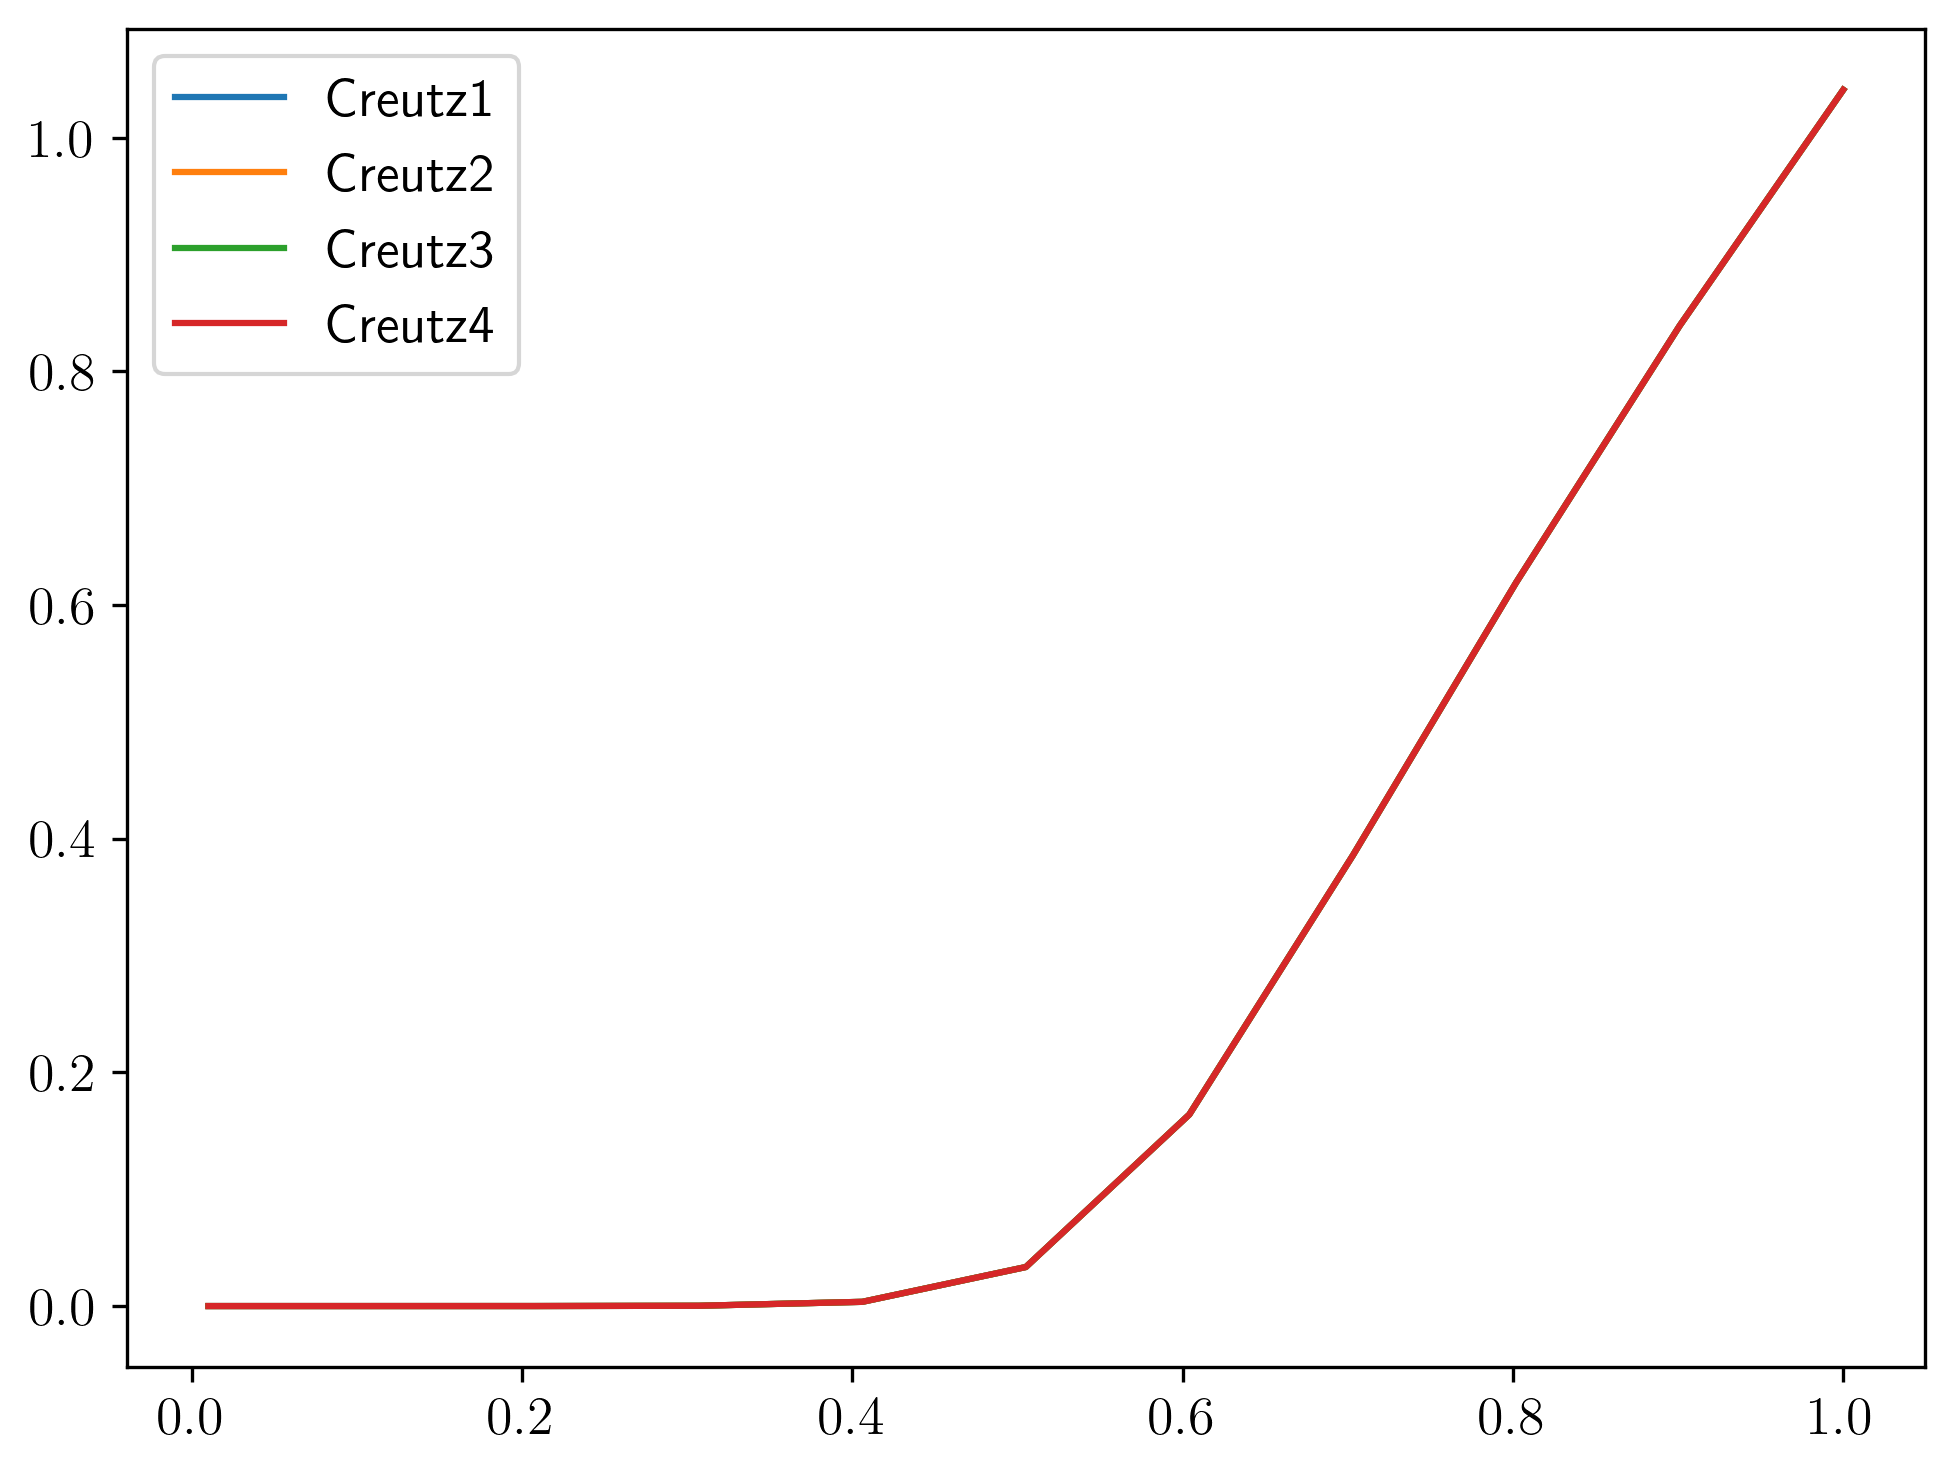

In [121]:
plot_creutz_ratio(L=L, chi=chi, loop_sites=loop_sites, dir_x=1, dir_y=1, params=params, label="Creutz1")
plot_creutz_ratio(L=L, chi=chi, loop_sites=loop_sites, dir_x=1, dir_y=-1, params=params, label="Creutz2")
plot_creutz_ratio(L=L, chi=chi, loop_sites=loop_sites, dir_x=-1, dir_y=1, params=params, label="Creutz3")
plot_creutz_ratio(L=L, chi=chi, loop_sites=loop_sites, dir_x=-1, dir_y=-1, params=params, label="Creutz4")

### Dual Magnetization

In [16]:
def plot_derivative_dual_mag_lattices(Ls, chis, h_i, h_f, npoints):
    colors = create_sequential_colors(len(chis))
    i = 0
    max_vals = []
    x_vals = []
    hs = np.linspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

    for L, chi in zip(Ls, chis):
        l = L
        string = np.load(f"{parent_path}/results/mag_data/dual_mag_first_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        d_string_dh = np.gradient(string, hs)
        idx_max = np.argmax(d_string_dh)
        max_vals.append(np.max(d_string_dh))
        x_vals.append(hs[idx_max])
        plt.plot(hs, string, color=colors[i], linestyle='--', label=f"${l}$x${L}$; $\chi={chi}$")
        plt.plot(hs, d_string_dh, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$ Der")
        i += 1
    plt.scatter(x_vals, max_vals, marker='o', facecolors="white", edgecolors="red")
    plt.title(f"Derivative of dual Magnetization of $Z_2$ different lattice sizes")
    plt.savefig(f"{parent_path}/figures/magnetization/dual_mag_derivative_first_moment_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

    plt.legend();
    return max_vals, x_vals, d_string_dh

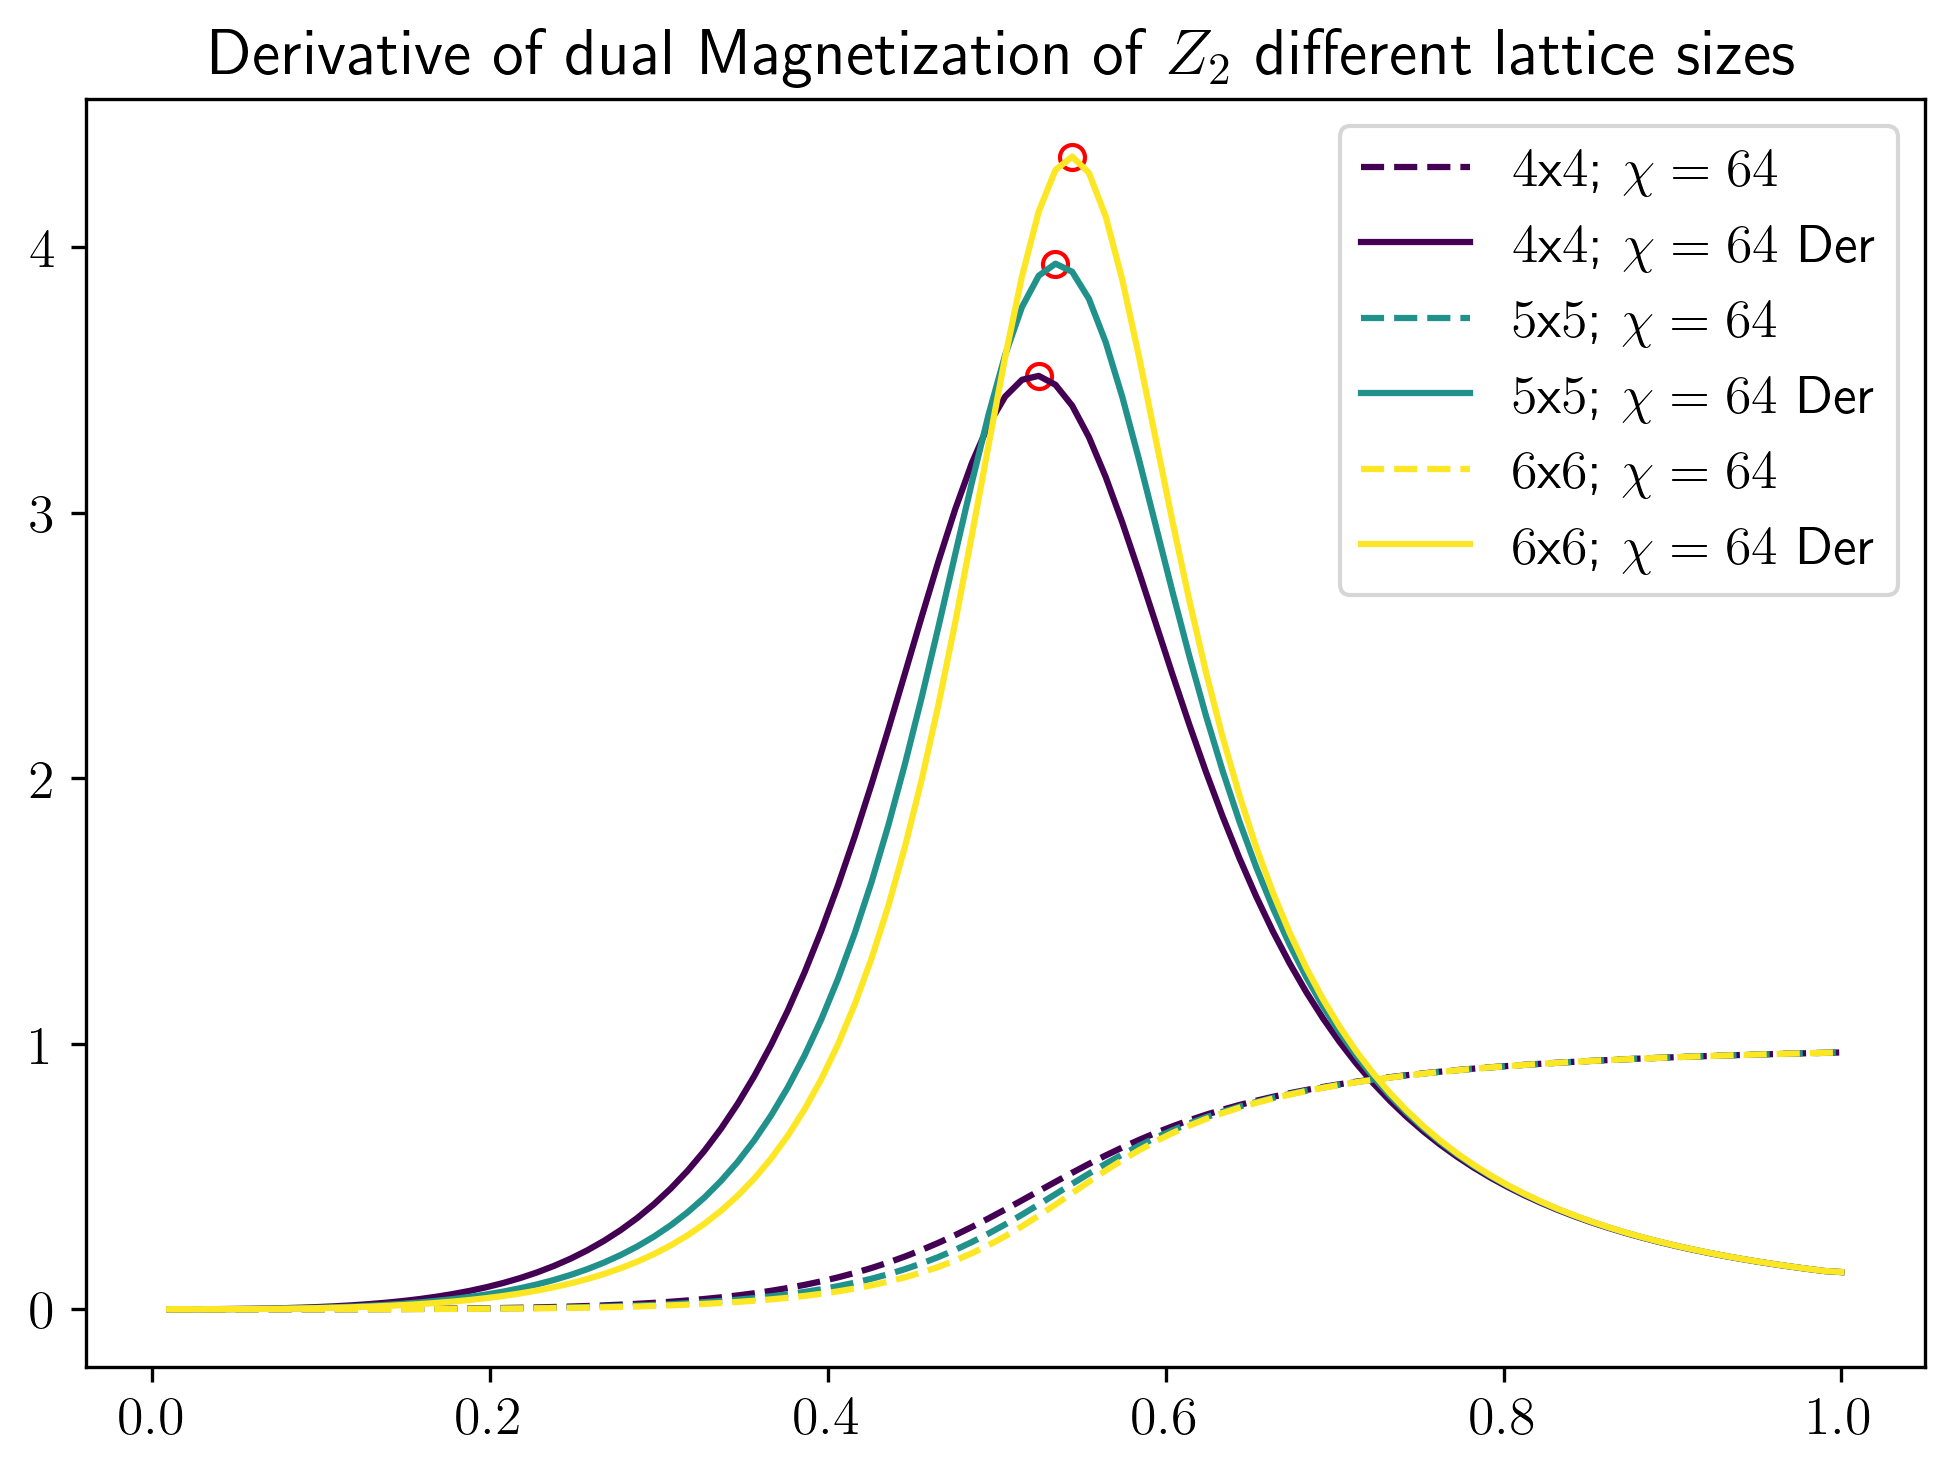

In [18]:
Ls = [4,5,6]
chis = [64,64,64]
h_i = 0.01
h_f = 1.0
npoints = 101
max_vals, x_vals, d_mag_dh = plot_derivative_dual_mag_lattices(Ls, chis, h_i, h_f, npoints)

In [19]:
def pow_law(L,b,c,x):
    return b + c*(L**x)

In [21]:
powp, powc = curve_fit(pow_law, x_vals, Ls, maxfev=2000)
print(f"Critical g: {powp[0]}")
print(f"nu: {-1/powp[2]}")

Critical g: -49.01010101010728
nu: -1.000000000000119


/var/folders/pb/r6cqvt7968zcz7c91mxxvzn40000gv/T/ipykernel_19671/947264904.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  powp, powc = curve_fit(pow_law, x_vals, Ls, maxfev=2000)


### 6. Susceptibility

In [42]:
def plot_susceptibility_dual_mag_lattices(Ls, chis, h_i, h_f, npoints):
    colors = create_sequential_colors(len(chis))
    i = 0
    max_vals = []
    x_vals = []
    hs = np.linspace(h_i,h_f,npoints)
    cx = None
    cy = None
    if cx == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(cx)}_particle(s)_sector"
    parent_path="/Users/fradm/Google Drive/My Drive/projects/1_Z2"

    for L, chi in zip(Ls, chis):
        l = L
        string = np.load(f"{parent_path}/results/mag_data/dual_mag_first_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        string_2 = np.load(f"{parent_path}/results/mag_data/dual_mag_second_moment_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
        sus = np.abs(string_2 - (string**2))
        idx_max = np.argmax(sus)
        max_vals.append(np.max(sus))
        x_vals.append(hs[idx_max])
        plt.plot(hs, sus, color=colors[i], linestyle='--', label=f"${l}$x${L}$; $\chi={chi}$")
        i += 1
    plt.scatter(x_vals, max_vals, marker='o', facecolors="white", edgecolors="red")
    plt.title(f"Susceptibility of dual Magnetization of $Z_2$ different lattice sizes")
    plt.savefig(f"{parent_path}/figures/magnetization/susceptibility_dual_mag_Z2_dual_direct_lattice_{Ls}x{Ls}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chis}.png")

    plt.legend();
    return max_vals, x_vals, sus

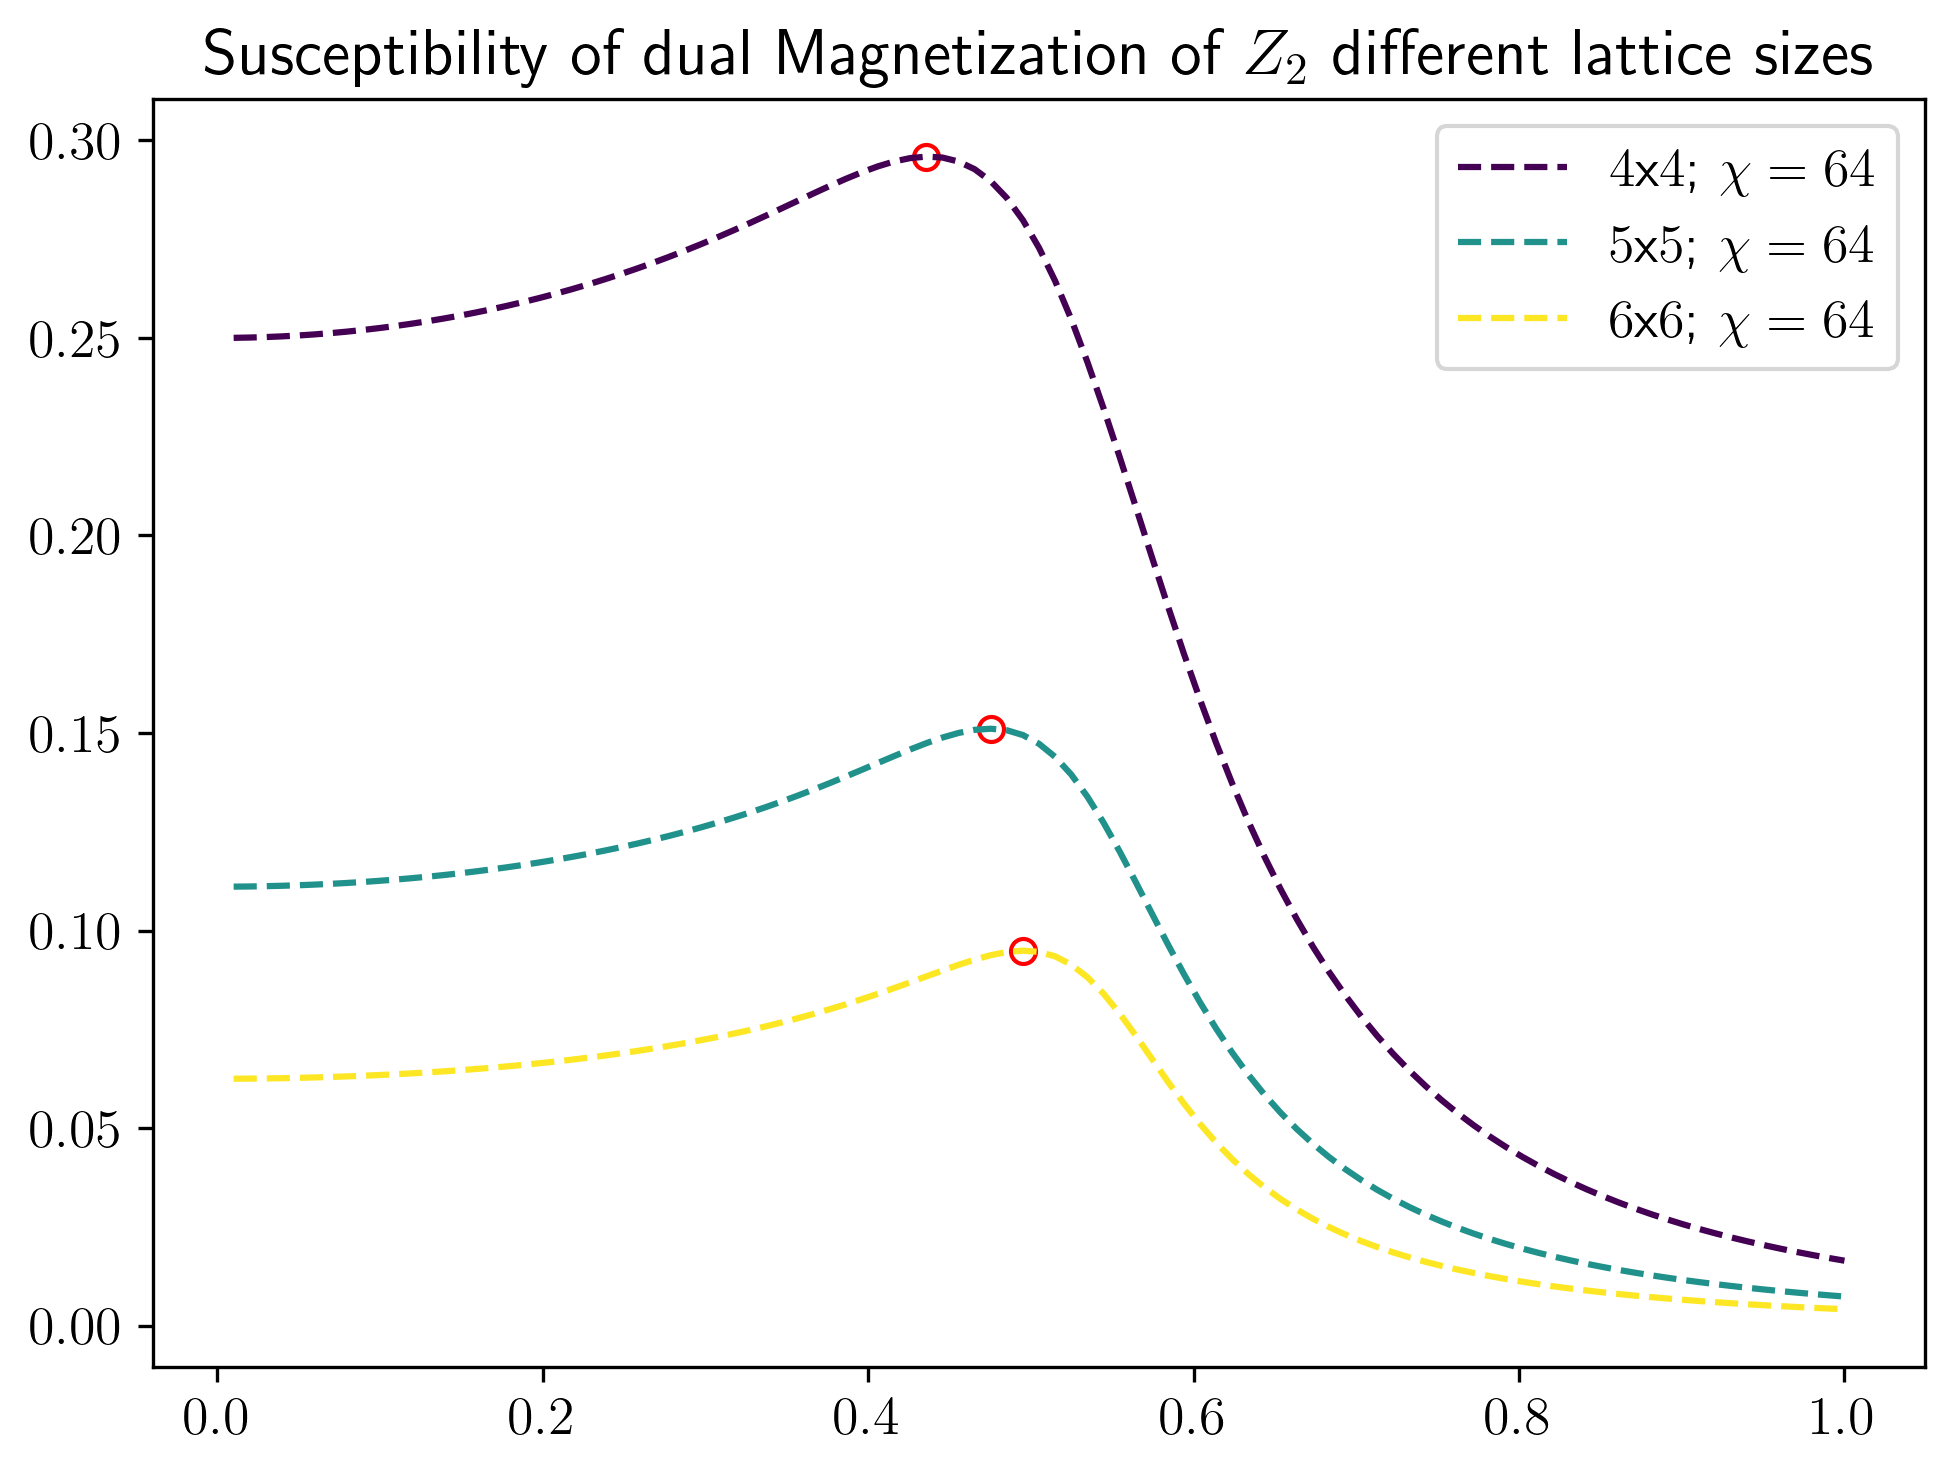

In [43]:
Ls = [4,5,6]
chis = [64,64,64]
h_i = 0.01
h_f = 1.0
npoints = 101
max_vals, x_vals, d_mag_dh = plot_susceptibility_dual_mag_lattices(Ls, chis, h_i, h_f, npoints)

In [41]:
powp, powc = curve_fit(pow_law, x_vals, Ls, maxfev=2000)
print(f"Critical g: {powp[0]}")
print(f"nu: {-1/powp[2]}")

Critical g: 3.486847565630596
nu: -0.08044577341161378


/var/folders/pb/r6cqvt7968zcz7c91mxxvzn40000gv/T/ipykernel_19671/947264904.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  powp, powc = curve_fit(pow_law, x_vals, Ls, maxfev=2000)
